In [1]:
%matplotlib notebook
%autoreload 2
import ompy as om

# TODO

- [x] Implement units for Matrix
- [x] Enforce Vector(values, E), Matrix(Values, Ex, Eg)
- [ ] Make units work for the rest of the code
- [ ] Test and add __set__ for iloc and loc, also for vector
- [ ] Implement shape
- [ ] Implement Model
- [ ] Write doc
- [ ] Write tests
- [ ] Fix rebin
- [ ] Add nuisance parameters for normalization, treat uncertainty as parameters.
- [ ] Fix warnings
- [x] Forward vector.func to vector.values.func
- [x] Make vector.E = vector._E.magnitude?
- [ ] Explore JAX and Julia interface
- [ ] Read through all issues
- [ ] Find a better way to handle uncertainty
- Rebinning to preserve counts does not preserve integral

# Testing

In [3]:
Ex = np.linspace(0, 1, 20)
Eg = np.linspace(0, 2, 30)
val = np.linspace(1, 7, 600).reshape((20, 30))
mat = om.Matrix(Ex=Ex, Eg=Eg, values=val)
matT = om.Matrix(Eg=Ex, Ex=Eg, values=val.T)

In [4]:
E = np.linspace(0, 100, 1000)
values = 2*E**2 #+ np.random.normal(scale=0.01, size=E.shape)
vec = om.Vector(E=E, values=values, std=1*values**0.5)

In [6]:
(vec@vec).values

80120133466.78679

<IPython.core.display.Javascript object>


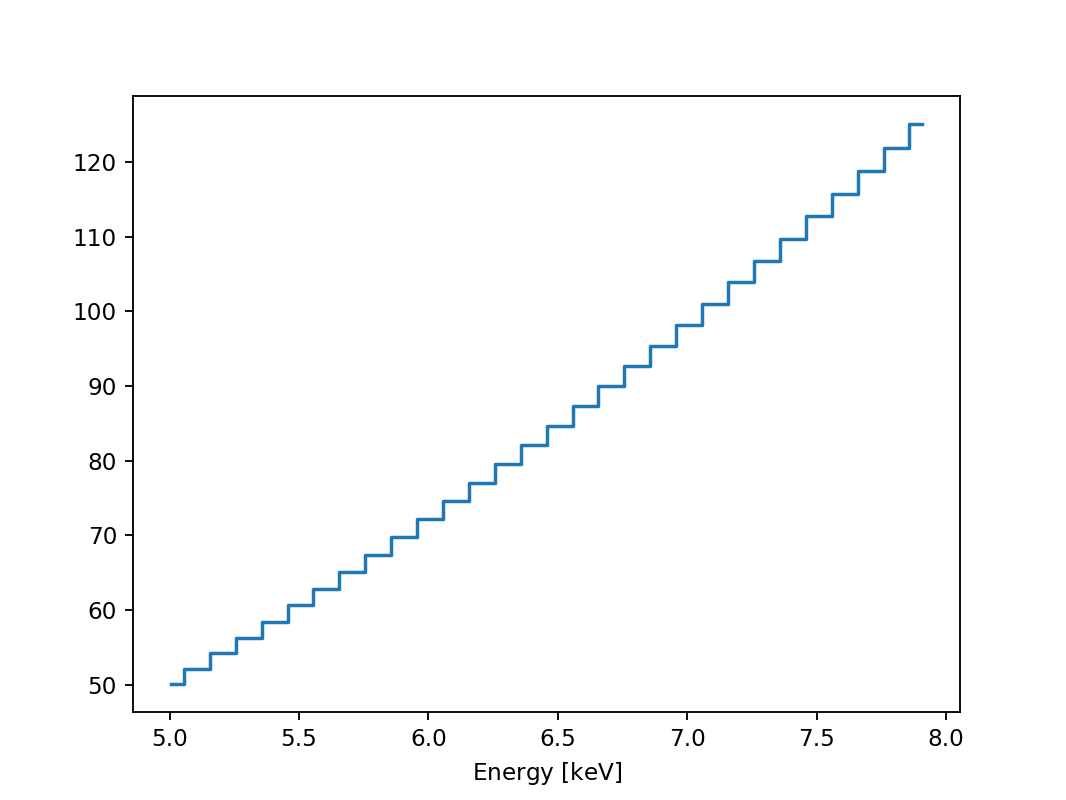

Energy: 5.005005005005005 to 7.907907907907909 [keV]
Binwidth: 0.10010010010010006
[ 50.1001502   52.12419627  54.18832246  56.29252877  58.43681519
  60.62118174  62.84562841  65.1101552   67.41476211  69.75944914
  72.14421629  74.56906356  77.03399095  79.53899846  82.08408609
  84.66925384  87.29450171  89.9598297   92.66523781  95.41072604
  98.19629439 101.02194286 103.88767146 106.79348017 109.739369
 112.72533795 115.75138702 118.81751621 121.92372553 125.07001496]
[ 7.07814596  7.21970888  7.3612718   7.50283472  7.64439763  7.78596055
  7.92752347  8.06908639  8.21064931  8.35221223  8.49377515  8.63533807
  8.77690099  8.91846391  9.06002683  9.20158975  9.34315266  9.48471558
  9.6262785   9.76784142  9.90940434 10.05096726 10.19253018 10.3340931
 10.47565602 10.61721894 10.75878186 10.90034478 11.04190769 11.18347061]


In [93]:
vec2 = vec.loc['5 keV':'8 keV']
#_, ax = vec2.plot(kind='step', alpha=0.5)
vec2.plot(kind='step')
#vec2.plot(ax=ax, kind='step', alpha=0.5)
print(vec2)

<IPython.core.display.Javascript object>


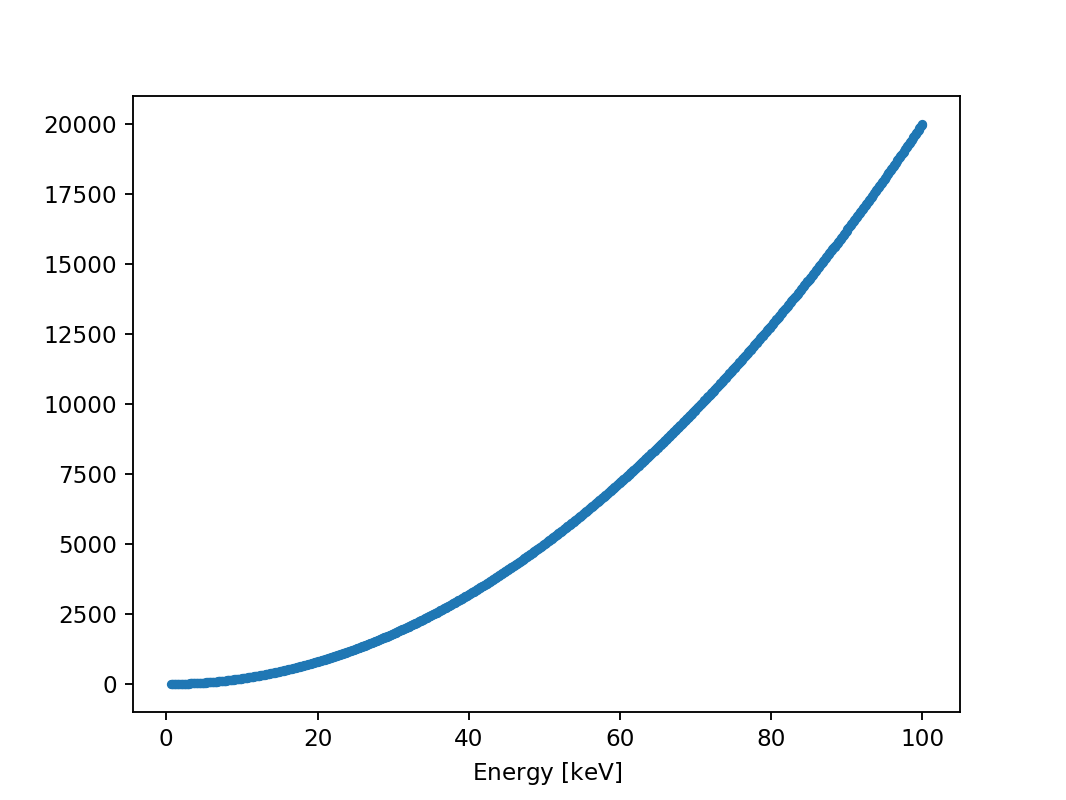

[  0.6006006    0.7007007    0.8008008    0.9009009    1.001001
   1.1011011    1.2012012    1.3013013    1.4014014    1.5015015
   1.6016016    1.7017017    1.8018018    1.9019019    2.002002
   2.1021021    2.2022022    2.3023023    2.4024024    2.5025025
   2.6026026    2.7027027    2.8028028    2.9029029    3.003003
   3.1031031    3.2032032    3.3033033    3.4034034    3.5035035
   3.6036036    3.7037037    3.8038038    3.9039039    4.004004
   4.1041041    4.2042042    4.3043043    4.4044044    4.5045045
   4.6046046    4.7047047    4.8048048    4.9049049    5.00500501
   5.10510511   5.20520521   5.30530531   5.40540541   5.50550551
   5.60560561   5.70570571   5.80580581   5.90590591   6.00600601
   6.10610611   6.20620621   6.30630631   6.40640641   6.50650651
   6.60660661   6.70670671   6.80680681   6.90690691   7.00700701
   7.10710711   7.20720721   7.30730731   7.40740741   7.50750751
   7.60760761   7.70770771   7.80780781   7.90790791   8.00800801
   8.10810811   8.2082

In [34]:
vec2 = vec.cut(Emin='600 eV')
vec2.plot()
print(vec2.E)

<IPython.core.display.Javascript object>


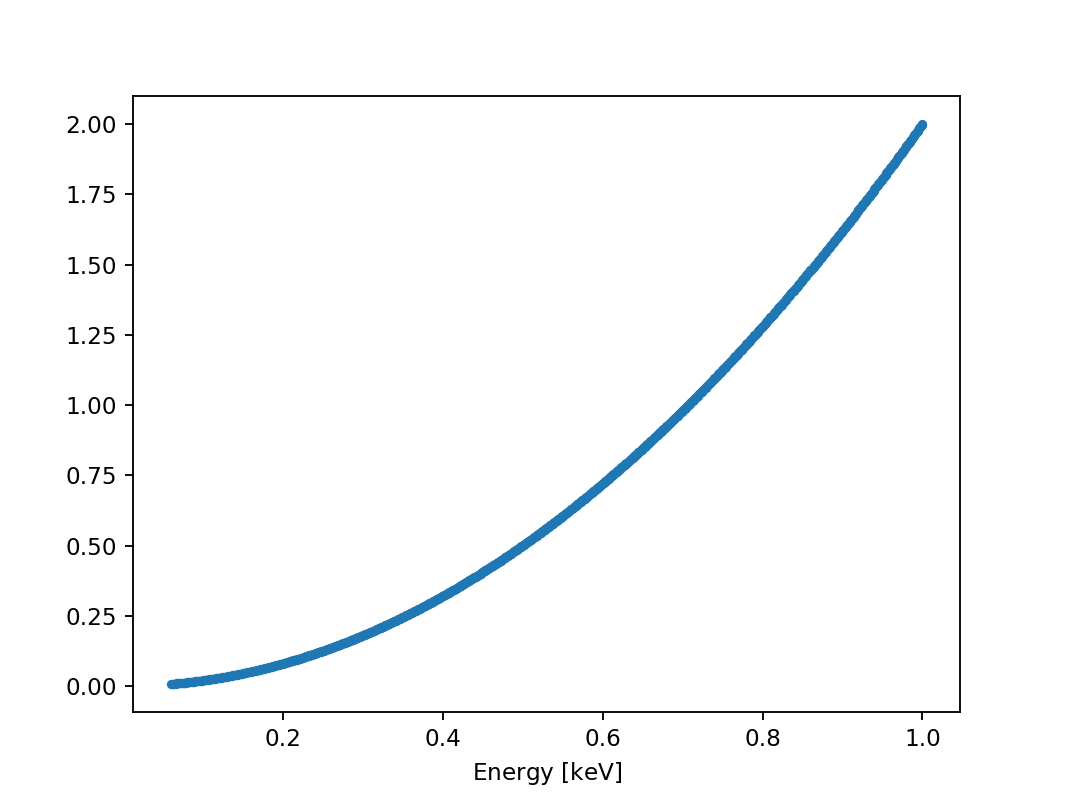

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Energy [$\\mathrm{keV}$]'>)

In [4]:
vec2 = vec.cut('60 eV')
vec2.plot()

<IPython.core.display.Javascript object>


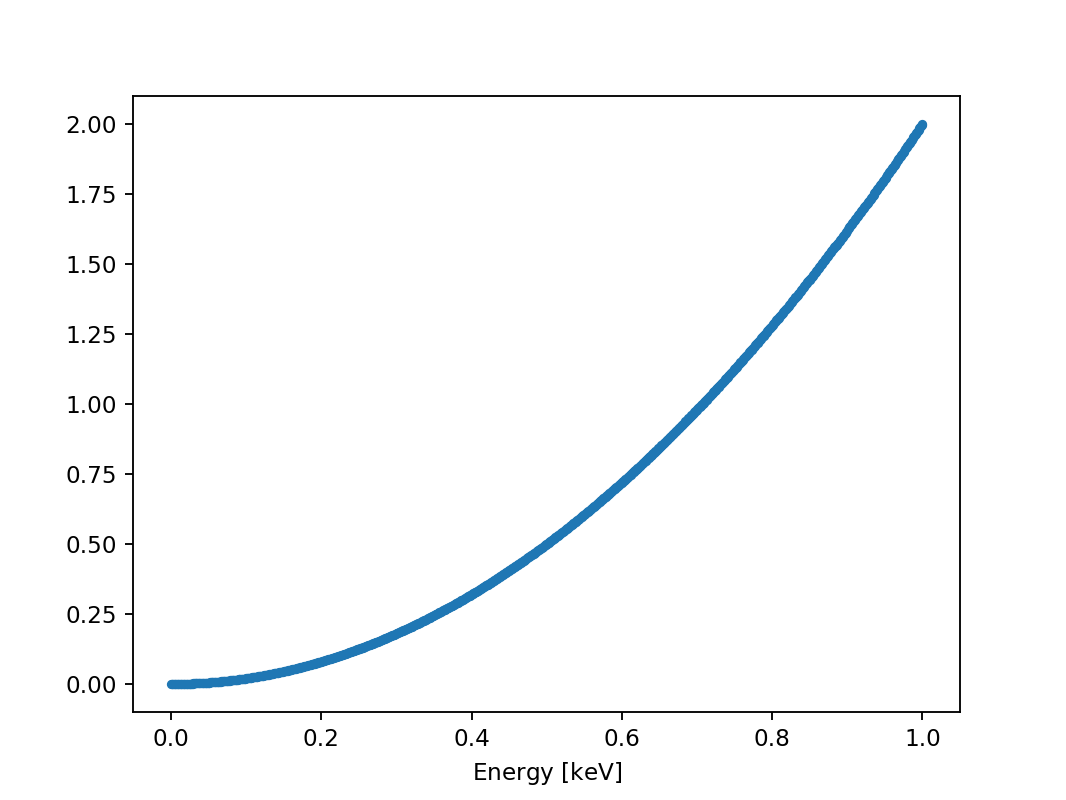

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Energy [$\\mathrm{keV}$]'>)

In [23]:
vec.plot()

In [37]:
%timeit vec2=vec.rebin(factor=2)

1.11 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The rebinning resizes the vector.


<IPython.core.display.Javascript object>


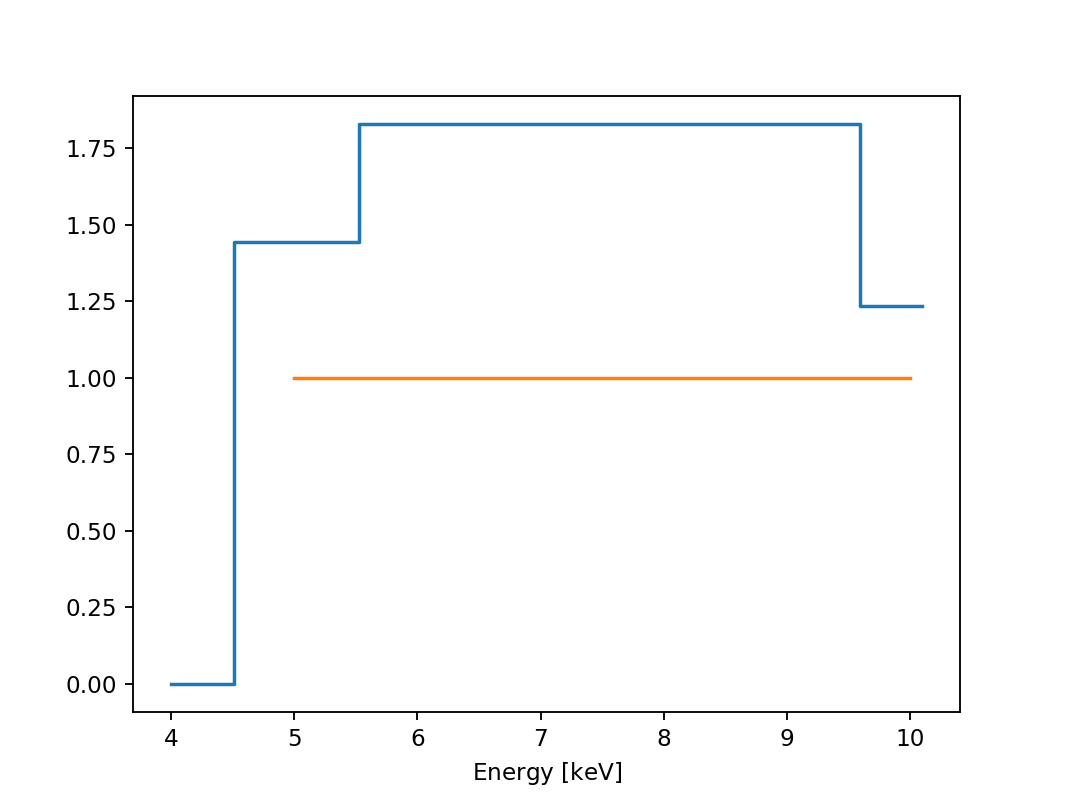

9.999999999999995
10.0
1.0
1.4285714285714277


In [49]:
E = np.linspace(5, 10, 10)
values = np.ones_like(E)
vector = om.Vector(E=E, values=values)
vector2 = vector.rebin(np.linspace(4., 10.1, 7))
_, ax = vector2.plot(kind='step')
vector.plot(ax=ax, kind='step')
print(vector2.sum())
print(vector.sum())
print(vector.values.mean())
print(vector2.values.mean())

<IPython.core.display.Javascript object>


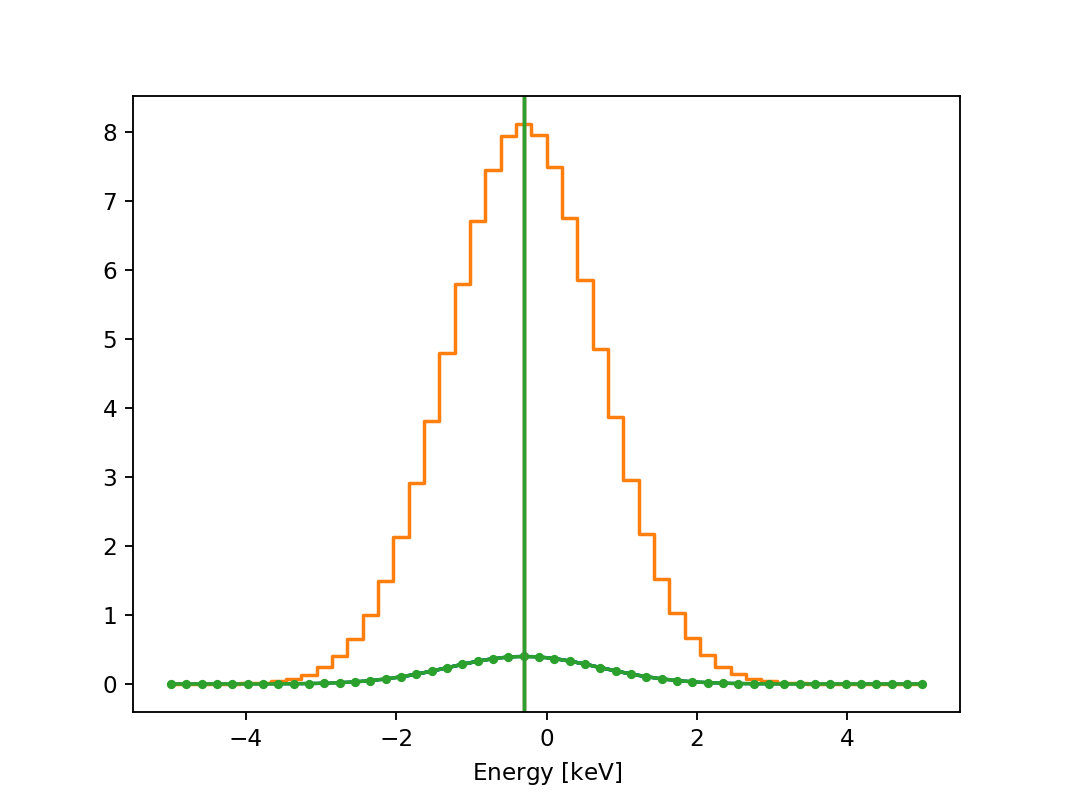

99.89986758209683 99.89986758209683 4.899996155205841
-0.299994087680177
-0.2999941474358674
-0.299994087680177
0.9999690911757995
1.0034484781707782
0.9999690911757995


In [9]:
E = np.linspace(-5, 5, 1000)
μ = -0.3
σ = 1.0
gauss = lambda x:  1.0/(σ*np.sqrt(2*np.pi))*np.exp(-0.5*((x-μ)/σ)**2)
v = gauss(E)
def mean(x, y):
    de = abs(x[1]-x[0])
    return 1/np.sum(y)*np.sum(x*y)
def var(v):
    x, y = v._E, v.values
    m = mean(x, y)
    return 1/np.sum(y)*np.sum(y*(x-m)**2)

vec = om.Vector(E=E, values=v)
_, ax = vec.plot(kind='step')
vec2 = vec.rebin(np.linspace(-5, 5, 50))
vec2.plot(ax=ax, kind='step')
E2 = np.linspace(-5, 5, 50)
v2 = gauss(E2)
vec3 = om.Vector(E=E2, values=v2)
vec3.plot(ax=ax)
ax.axvline(mean(vec.E.magnitude, vec.values))
ax.axvline(mean(vec2.E.magnitude, vec2.values), c='C1')
ax.axvline(mean(vec3.E.magnitude, vec3.values), c='C2')
print(vec.sum(), vec2.sum(), vec3.sum())
print(mean(vec.E.magnitude, vec.values))
print(mean(vec2.E.magnitude, vec2.values))
print(mean(E, v))
for v in [vec, vec2, vec]:
    print(var(v))

In [122]:
fig, ax = plt.subplots()
ax.plot(E, v)
ax.axvline(np.mean(E*v))

<IPython.core.display.Javascript object>

In [ ]:
def integral(x, y):
    s = 0.0
    for i in range(len(x)):
        

In [4]:
s = 0.0
de = abs(vec2._E[1] - vec2._E[0])
for i in range(len(vec2)):
    s += vec2._E[i] * vec2.values[i]*de
print(s)

-6.1161991029075775


In [81]:
?copy.deepcopy

In [82]:
om.ureg.Quantity(om.ureg.Quantity("50 keV")).to('MeV')

0.04999999999999999 <Unit('megaelectron_volt')>

In [84]:
"5".lol

AttributeError: 'str' object has no attribute 'lol'

<IPython.core.display.Javascript object>


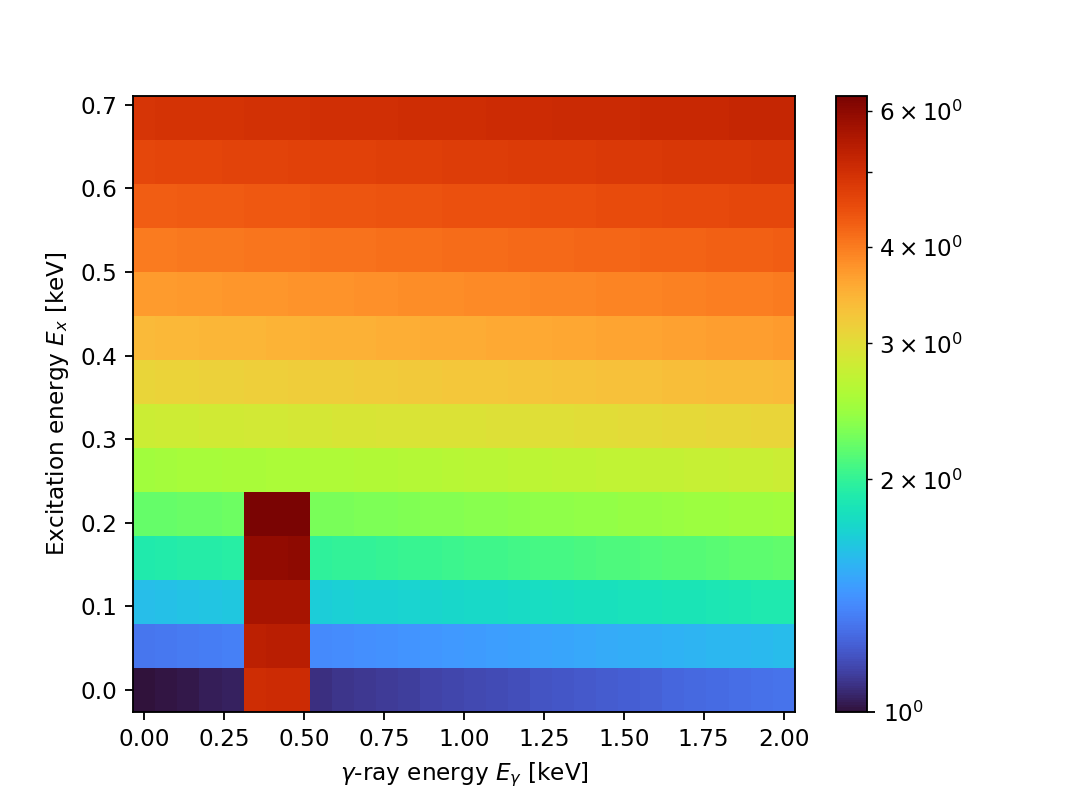

(<matplotlib.collections.QuadMesh at 0x7f2df8cbc7c0>,
 <AxesSubplot:xlabel='$\\gamma$-ray energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 <Figure size 640x480 with 2 Axes>)

In [93]:
m = mat.cut(axis='Ex', Emax='700 eV')
m.plot(cmap='turbo')

In [109]:
x = np.linspace(0, 120, 120)
Eg = np.linspace(0, 180, 180)*om.ureg.MeV
values = np.random.random((120, 180))
mat = om.Matrix(values=values, Ex=Ex, Eg=Eg)
mat.to_same_Ex(np.array([0.1, 0.2])*om.u.MeV)
#mat.cut('Eg', Emax='0.1 GeV').plot()

array([100., 200.])

<IPython.core.display.Javascript object>


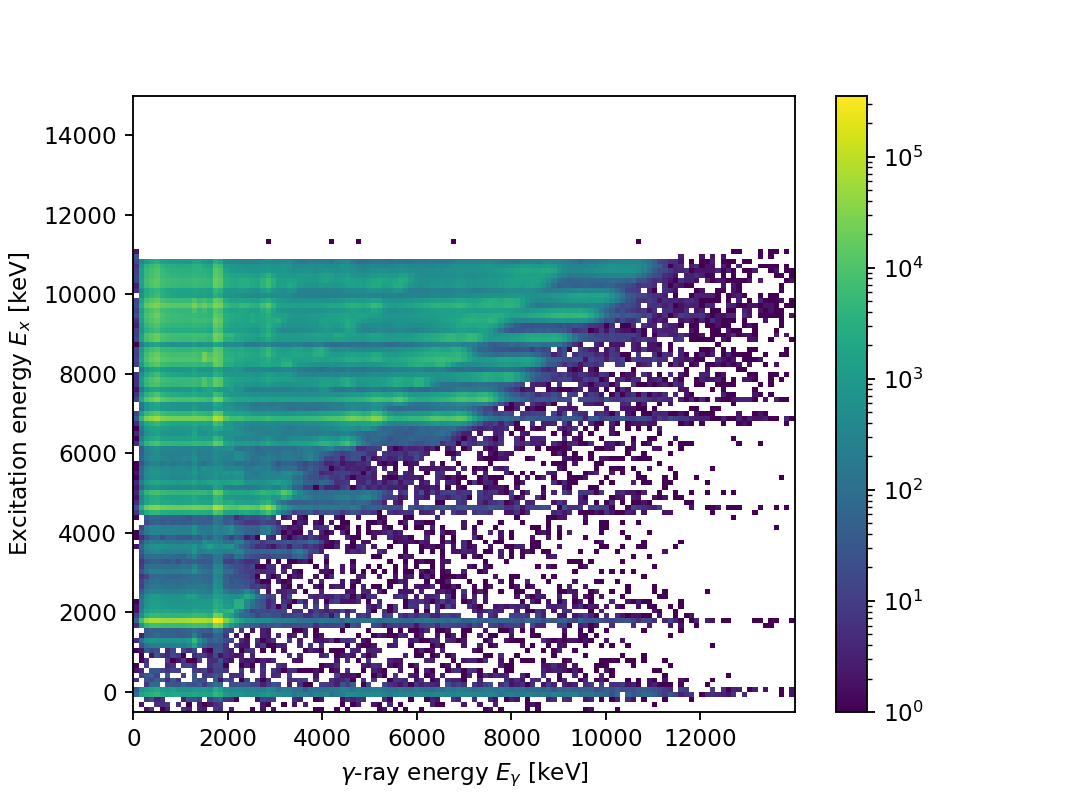

(<matplotlib.collections.QuadMesh at 0x7f2df265e340>,
 <AxesSubplot:xlabel='$\\gamma$-ray energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 <Figure size 640x480 with 2 Axes>)

In [116]:
si = om.example_raw('si28').to('keV')
si.plot()

In [117]:
si.sum()

AttributeError: 'Matrix' object has no attribute 'sum'

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Energy [$\\mathrm{MeV}$]'>)

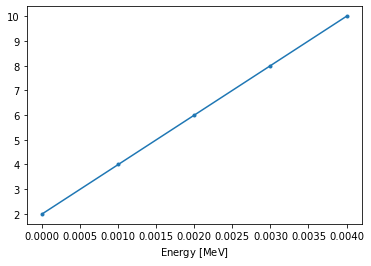

In [10]:
u.to('MeV').plot()

In [7]:
mat = om.Matrix(path='firstgen.npy')

In [ ]:
om.Q('1 MeV')

In [21]:
om.ureg('0.1 MeV').to('keV')

100.0 <Unit('kiloelectron_volt')>

In [2]:
values = np.linspace(0, 99, 100)
E = np.linspace(0, 99, 100)
vec = om.Vector(E=E, values=values)

In [10]:
import warnings

In [11]:
warnings.warn(
      "method1 is deprecated, use new_method instead",
      DeprecationWarning
   )

In [3]:
vec.rebin(factor=0.5)

Upsamling does not preserve the total count.


In [16]:
om.logging.get_logger('vector', 'INFO')

<Logger ompy.vector (INFO)>

In [132]:
vec.rebin(factor=2.0).sum()

2021-04-16 09:02:44,123 - ompy.vector - DEBUG - Rebinning with factor 2, giving 25 mids
2021-04-16 09:02:44,124 - ompy.vector - DEBUG - Old step size: 20.4082
New step size: 41.6667


4999.999999999988

<IPython.core.display.Javascript object>


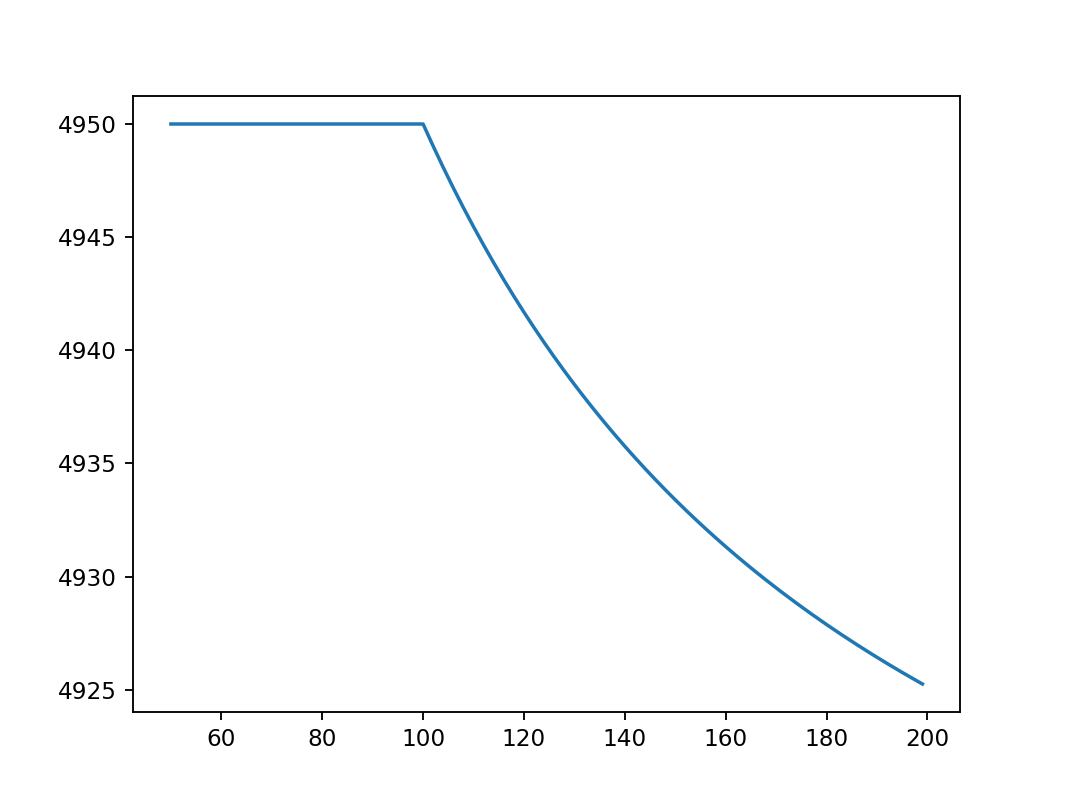

In [217]:
fig, ax = plt.subplots()
s = []
factors = np.linspace(0.1, 3, 1000)
factors = np.arange(50, 200)
for i in factors:
    #s.append(vec.rebin(factor=i).sum())
    mids = np.linspace(vec[0], vec[-1], i)
    s.append(vec.rebin(mids).sum())
ax.plot(factors, s)

In [138]:
np.linspace(vec.E[0], vec.E[-1], 200).sum()

100000.0 <Unit('kiloelectron_volt')>

In [220]:
vec.rebin(factor=0.5)

In [188]:
vec.sum()

4950.0

In [215]:
vec.rebin(np.linspace(0, 99, 150)).sum()

4933.389261744976

In [179]:
vec.E.magnitude[1] - vec.E.magnitude[0]

1.0

In [181]:
np.linspace(vec.E[0], vec.E[-1], num=int(0.5*len(vec))).sum()

2474.9999999999995 <Unit('kiloelectron_volt')>

In [184]:
np.arange(vec.E[0].magnitude, vec.E[-1].magnitude, 2.0).sum()

2450.0

# OMpy

## Raw

In [2]:
dy = om.example_raw('Dy164')

<IPython.core.display.Javascript object>


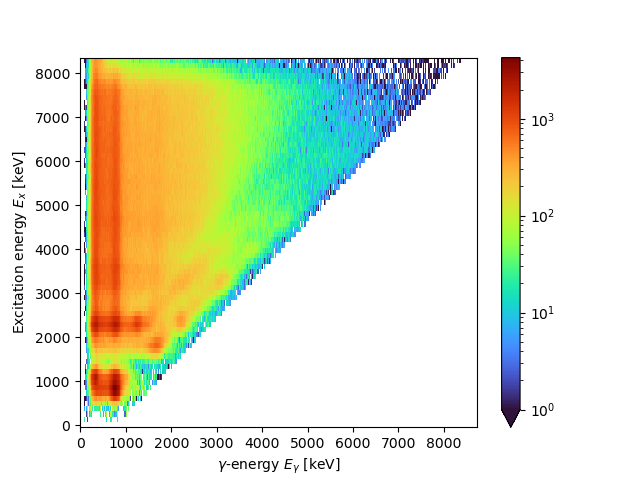

In [3]:
dy = dy.cut_diagonal(E1=(800, 0), E2=(7500, '7.3 MeV'))
dy = dy.cut('Ex', 0, '8.4 MeV')
_, ax, _ = dy.plot(cmap='turbo', vmin=1);

In [115]:
dy.save("dy_raw.npy")

## Unfolding & Firstgen

TRIED TO SET TO NONE. Using autoreload?
TRIED TO SET TO NONE. Using autoreload?
TRIED TO SET TO NONE. Using autoreload?
TRIED TO SET TO NONE. Using autoreload?
TRIED TO SET TO NONE. Using autoreload?
TRIED TO SET TO NONE. Using autoreload?
TRIED TO SET TO NONE. Using autoreload?
TRIED TO SET TO NONE. Using autoreload?


<IPython.core.display.Javascript object>


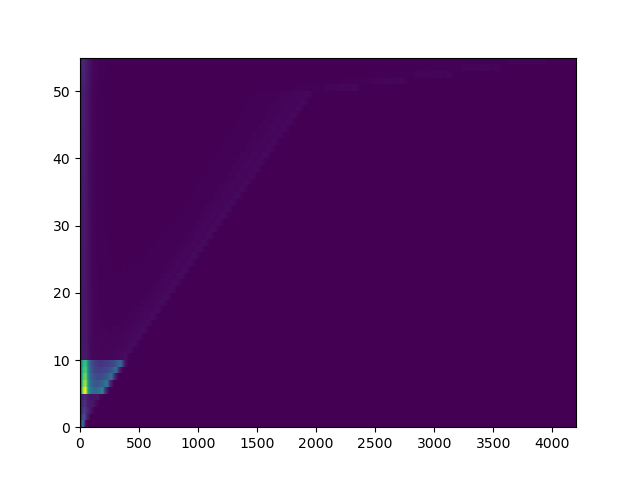

2022-01-19 20:41:08,644 - ompy.response - INFO - Note: Spectra outside of 200.0 and 20000.0 keV are extrapolation only.


<IPython.core.display.Javascript object>


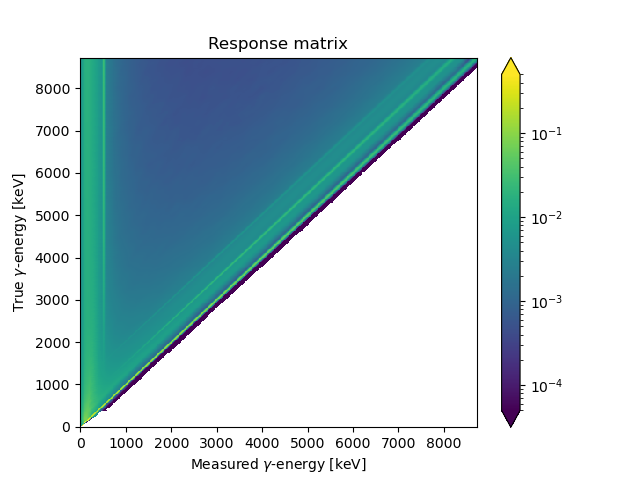

In [8]:
logger = om.introspection.get_logger('response', 'INFO')
# Then do the same using OMpy functionality:
# You may need to adpot this to whereever you response matrices are stored
folderpath = "../OCL_response_functions/oscar2017_scale1.15"

# Energy calibration of resulting response matrix:
Eg = dy.Eg

# Experimental relative FWHM at 1.33 MeV of resulting array
fwhm_abs = om.Q_('30 keV') # (30/1330 = 2.25% )

# Magne recommends 1/10 of the actual resolution for unfolding purposes
response = om.Response(folderpath)
R_ompy_view, R_tab_view = response.interpolate(Eg, fwhm_abs=fwhm_abs, return_table=True)
#R_ompy_unf, R_tab_unf = response.interpolate(Eg, fwhm_abs=fwhm_abs/10, return_table=True)
R_ompy_view.plot(title="Response matrix", vmin=5e-5, vmax=5e-1,
                 scale="log");

<IPython.core.display.Javascript object>


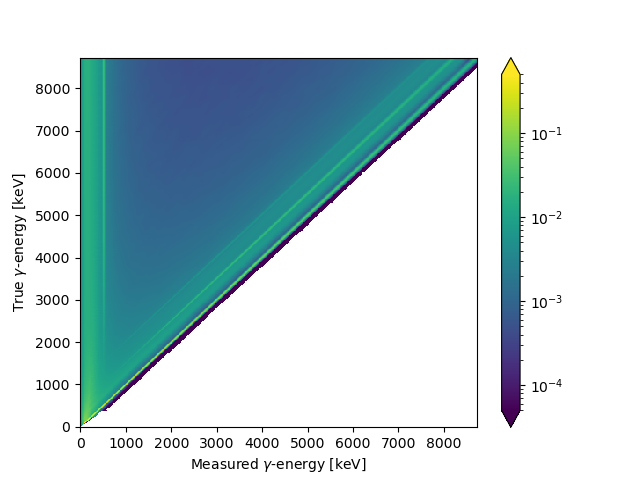

((<matplotlib.collections.QuadMesh at 0x7f3eb714b3a0>,
  <matplotlib.colorbar.Colorbar at 0x7f3eb6f843a0>),
 <AxesSubplot:xlabel='Measured $\\gamma$-energy [$\\mathrm{keV}$]', ylabel='True $\\gamma$-energy [$\\mathrm{keV}$]'>,
 <Figure size 640x480 with 2 Axes>)

In [10]:
R_ompy_view.plot(vmin=5e-5, vmax=5e-1, scale="log")

<IPython.core.display.Javascript object>


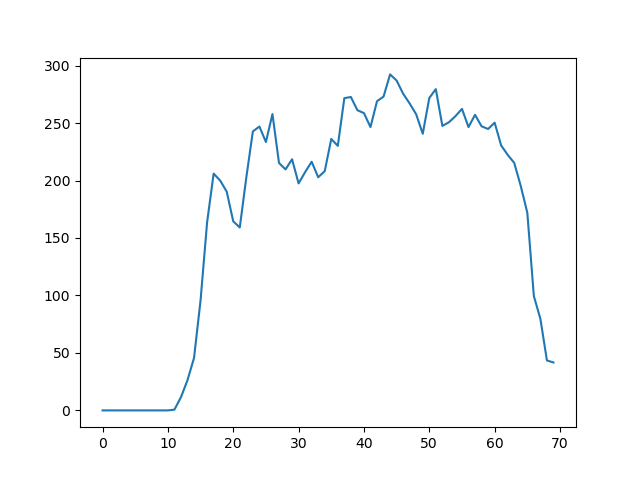

In [28]:
fig, ax = plt.subplots()
#ax.plot(R_ompy_view[200, :])
ax.plot(dy[:, 100])

In [31]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

<IPython.core.display.Javascript object>


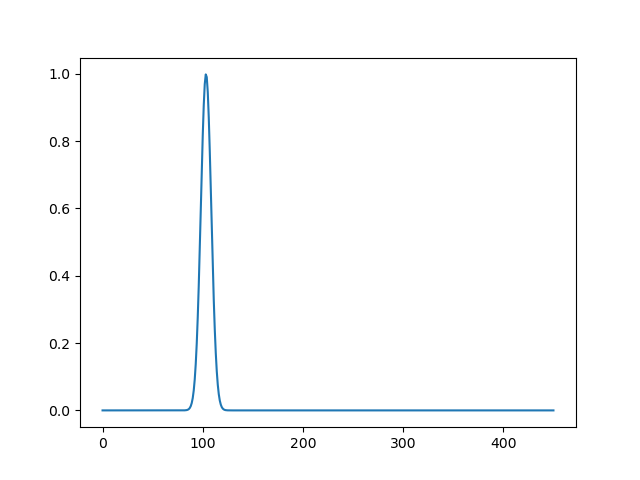

<IPython.core.display.Javascript object>


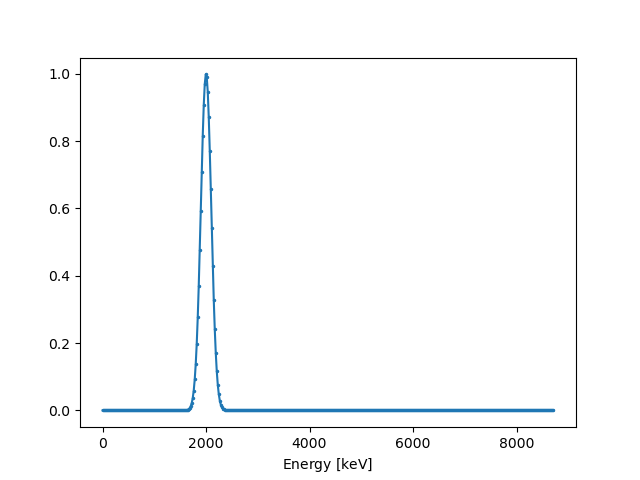

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Energy [$\\mathrm{keV}$]'>)

In [36]:
E = dy.Eg
v = gaussian(E, 2000, 100)
fig, ax = plt.subplots()
ax.plot(v)
u = om.Vector(E=E, values=v)
u.plot()

<IPython.core.display.Javascript object>


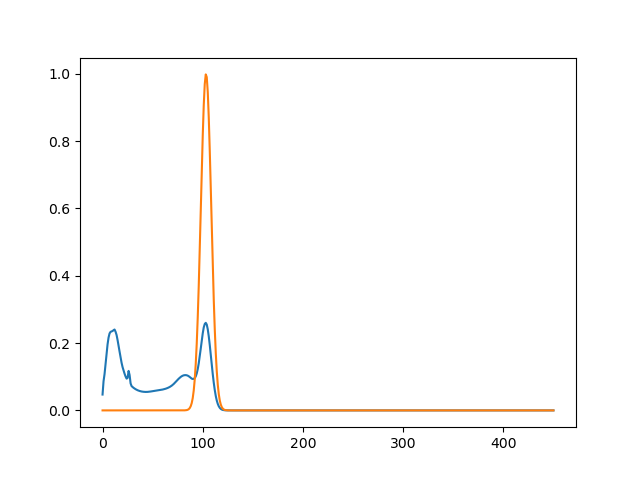

In [68]:
R = R_ompy_view.values.T
prod = R@v
fig, ax = plt.subplots()
ax.plot(prod)
ax.plot(v)

In [56]:
from scipy.linalg import null_space

In [69]:
Rnull = null_space(R)

<IPython.core.display.Javascript object>


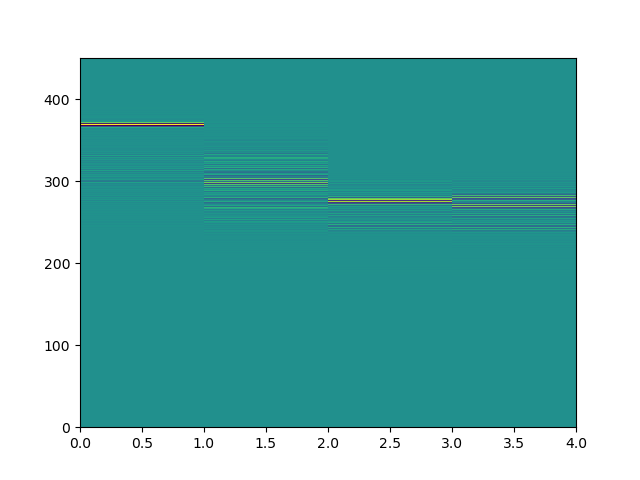

In [70]:
fig, ax = plt.subplots()
ax.pcolormesh(Rnull)

In [74]:
(R@Rnull)

array([[-3.49401091e-19, -5.42101086e-20,  3.55753838e-20,
        -3.65918233e-19],
       [-3.64492041e-17,  1.84754826e-17,  1.72540611e-18,
        -3.21533707e-17],
       [ 3.60412519e-19,  8.30769915e-18,  1.70490792e-17,
         5.29226185e-18],
       ...,
       [ 1.00628524e-14,  5.57199768e-16, -6.42469013e-18,
        -2.13070410e-18],
       [-2.79651395e-14, -7.93989761e-16, -3.48269111e-18,
        -4.81869104e-18],
       [ 1.44866463e-14,  3.47584538e-16, -1.57629287e-19,
         1.77672249e-19]])

In [72]:
Rnull

array([[ 1.18991201e-06,  4.83713548e-08,  6.41642559e-07,
         0.00000000e+00],
       [ 2.12474941e-06,  3.75599638e-08,  1.80564658e-06,
        -2.95971714e-07],
       [ 2.66968863e-06,  4.22841089e-07,  3.14699386e-06,
        -5.79283432e-07],
       ...,
       [ 1.39354105e-09,  1.10601446e-10, -4.13150417e-14,
         1.25685500e-13],
       [-7.69252302e-10, -5.88755006e-11,  2.04402467e-14,
        -6.97572696e-14],
       [ 1.94390171e-10,  1.36291102e-11, -4.22578639e-15,
         1.75667721e-14]])

<IPython.core.display.Javascript object>


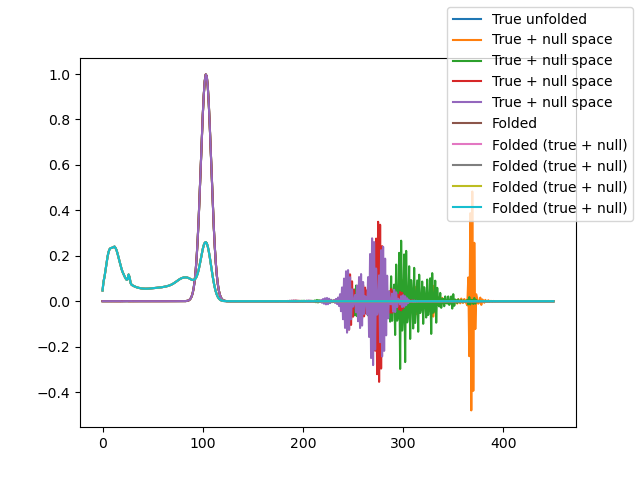

In [110]:
prod = R@v
vnull = np.zeros_like(Rnull)
prodnull = np.zeros_like(Rnull)
for i in range(Rnull.shape[1]):
    vnull[:, i] = Rnull[:, i] + v 
    prodnull[:, i] = R@vnull[:, i]

fig, ax = plt.subplots()
ax.plot(v, label="True unfolded")
ax.plot(vnull, label="True + null space")
ax.plot(prod, label="Folded")
ax.plot(prodnull, label="Folded (true + null)")
fig.legend()

<IPython.core.display.Javascript object>


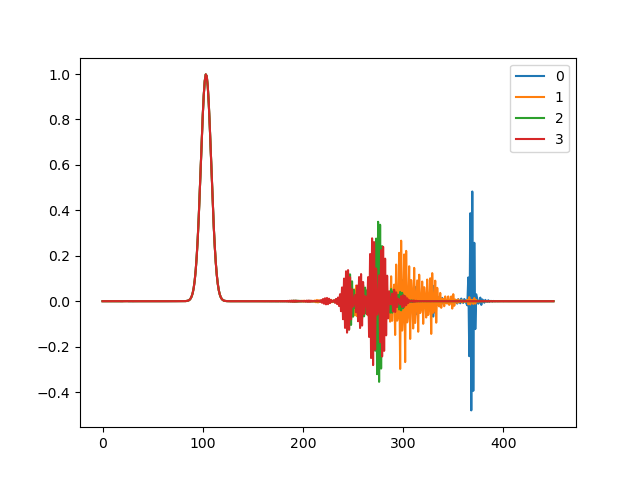

<IPython.core.display.Javascript object>


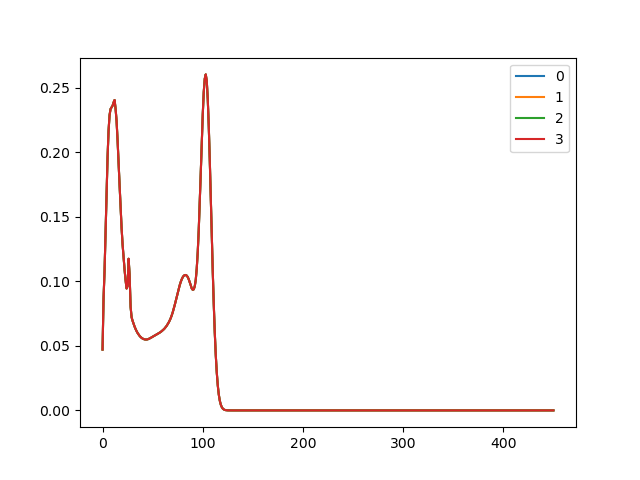

In [86]:
fig, ax = plt.subplots()
for i in range(vnull.shape[1]):
    ax.plot(vnull[:, i], label=f"{i}")
ax.legend()

fig, ax = plt.subplots()
for i in range(prodnull.shape[1]):
    ax.plot(prodnull[:, i], label=f"{i}")
ax.legend()

In [99]:
d = dy[40, :]

<IPython.core.display.Javascript object>


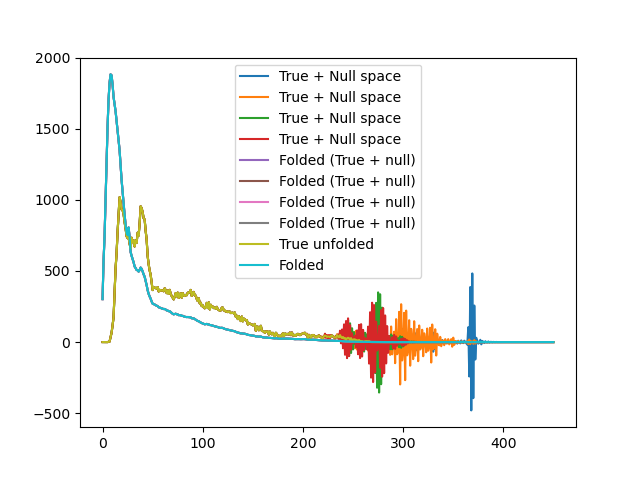

In [113]:

prod = R@d
dnull = np.zeros_like(Rnull)
prodnulld = np.zeros_like(Rnull)
for i in range(Rnull.shape[1]):
    dnull[:, i] = 1000*Rnull[:, i] + d 
    prodnulld[:, i] = R@dnull[:, i]

fig, ax = plt.subplots()
ax.plot(dnull, label="True + Null space")
ax.plot(prodnulld, label="Folded (True + null)")
ax.plot(d, label="True unfolded")
ax.plot(prod, label="Folded")
ax.legend()

<IPython.core.display.Javascript object>


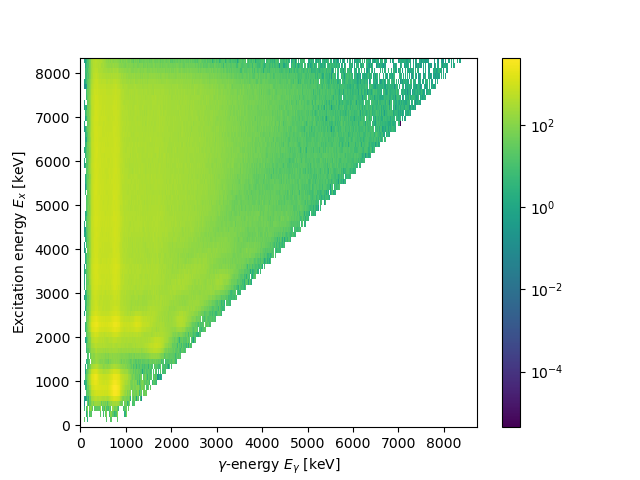

((<matplotlib.collections.QuadMesh at 0x7f3e8d4ebc10>,
  <matplotlib.colorbar.Colorbar at 0x7f3e8d54b7f0>),
 <AxesSubplot:xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 <Figure size 640x480 with 2 Axes>)

In [97]:
dy.plot()

In [98]:
dy.shape

(70, 451)

<IPython.core.display.Javascript object>


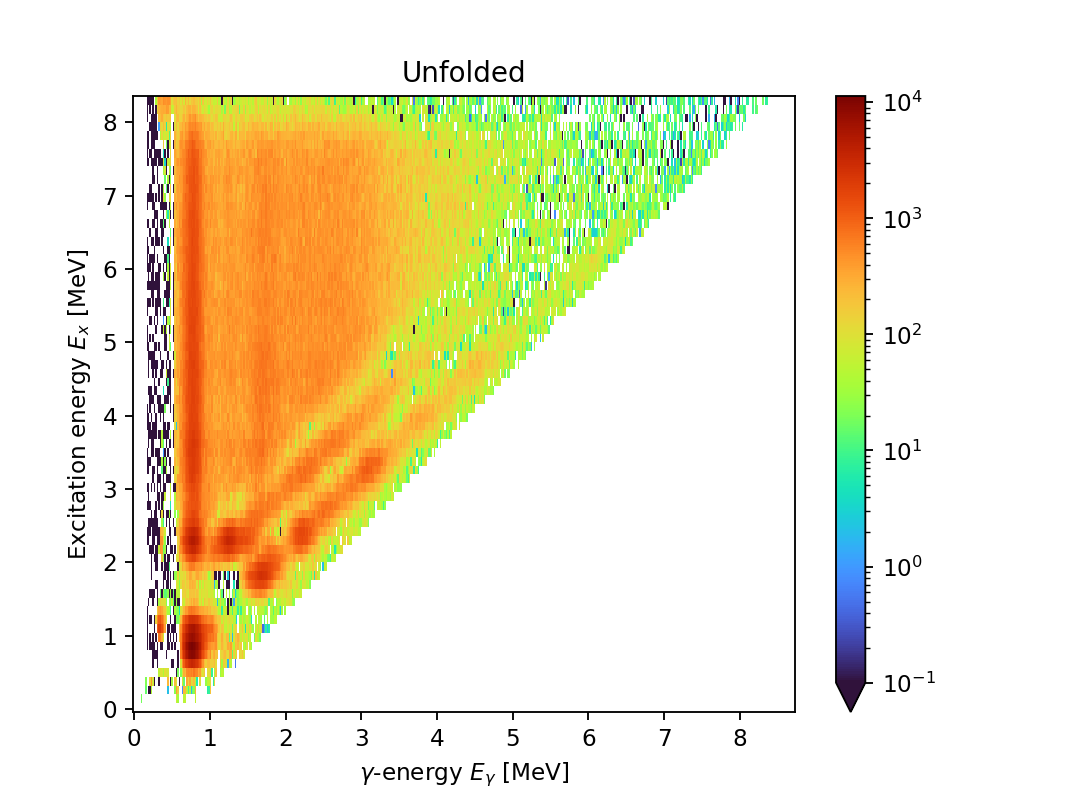

In [56]:
# You can decide to log information and set the logging level (info/debug)
logger = om.introspection.get_logger('unfolder', 'INFO')

# We need to remove negative counts (unphysical) in the raw matrix before unfolding:
raw_positive = dy.clone()
raw_positive.fill_and_remove_negative(window_size=2)

# With compton subtraction and all tweaks
unfolder= om.Unfolder(response=R_ompy_unf)
unfolder.use_compton_subtraction = True # default
unfolder.response_tab = R_tab_unf
# Magne suggests some "tweaks" for a better unfolding performance. Default is 1 for all.
unfolder.FWHM_tweak_multiplier = {"fe": 1., "se": 1.1, "de": 1.3, "511": 0.9}
unfolded = unfolder(raw_positive.to('MeV'))
unfolded.plot(cmap='turbo');
#unfolded.save(path='unfolded.npy')

In [15]:
unfolded = om.Matrix(path='unfolded.npy')

<IPython.core.display.Javascript object>


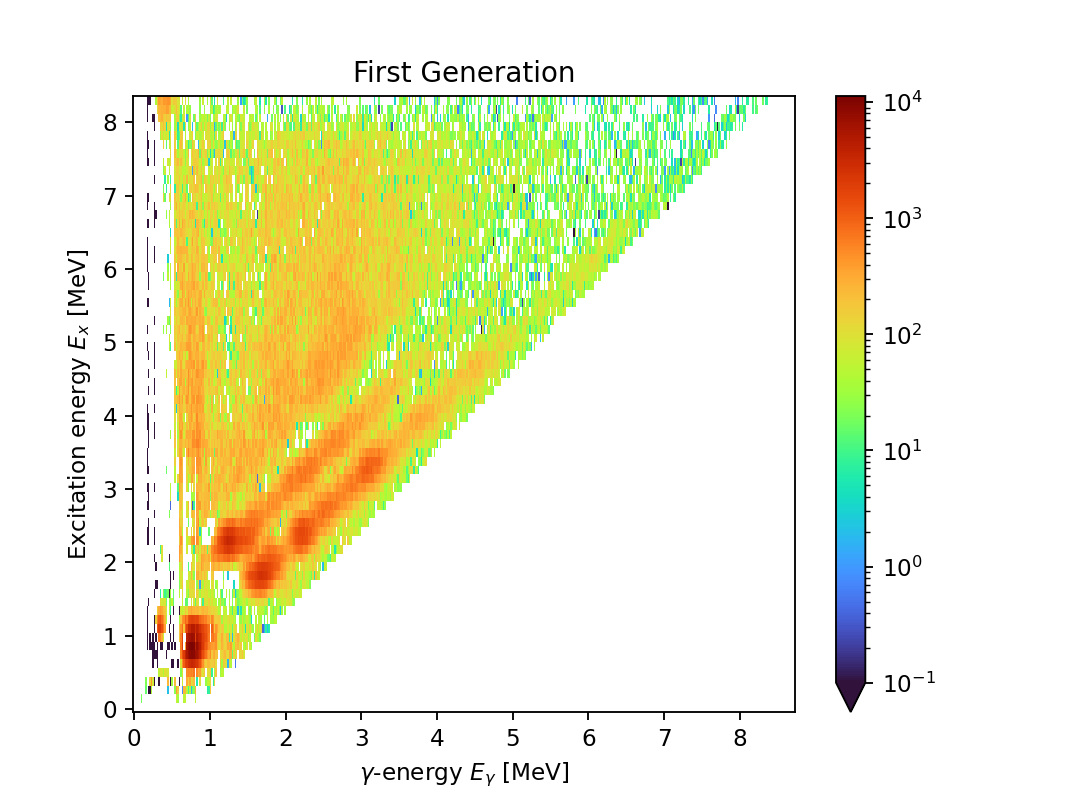

In [59]:
firstgen = om.FirstGeneration()
firstgen.multiplicity_estimation = 'statistical'
primary = firstgen(unfolded.to('MeV'))
(_, cbar), *_ = primary.plot(cmap='turbo');

## Ensemble

In [61]:
logger = om.introspection.get_logger('ensemble', 'INFO')

ensemble = om.Ensemble(raw=raw_positive, path='saved_run/ensemble2')
ensemble.unfolder = unfolder
ensemble.first_generation_method = firstgen
ensemble.generate(10, regenerate=False)

  0%|          | 0/10 [00:00<?, ?it/s]

2021-05-06 11:57:43,861 - ompy.ensemble - INFO - Generating/loading 0
2021-05-06 11:57:46,982 - ompy.ensemble - INFO - Generating/loading 1
2021-05-06 11:57:49,905 - ompy.ensemble - INFO - Generating/loading 2
2021-05-06 11:57:52,859 - ompy.ensemble - INFO - Generating/loading 3
2021-05-06 11:57:55,529 - ompy.ensemble - INFO - Generating/loading 4
2021-05-06 11:57:58,293 - ompy.ensemble - INFO - Generating/loading 5
2021-05-06 11:58:01,066 - ompy.ensemble - INFO - Generating/loading 6
2021-05-06 11:58:05,683 - ompy.ensemble - INFO - Generating/loading 7
2021-05-06 11:58:10,957 - ompy.ensemble - INFO - Generating/loading 8
2021-05-06 11:58:14,277 - ompy.ensemble - INFO - Generating/loading 9


<IPython.core.display.Javascript object>


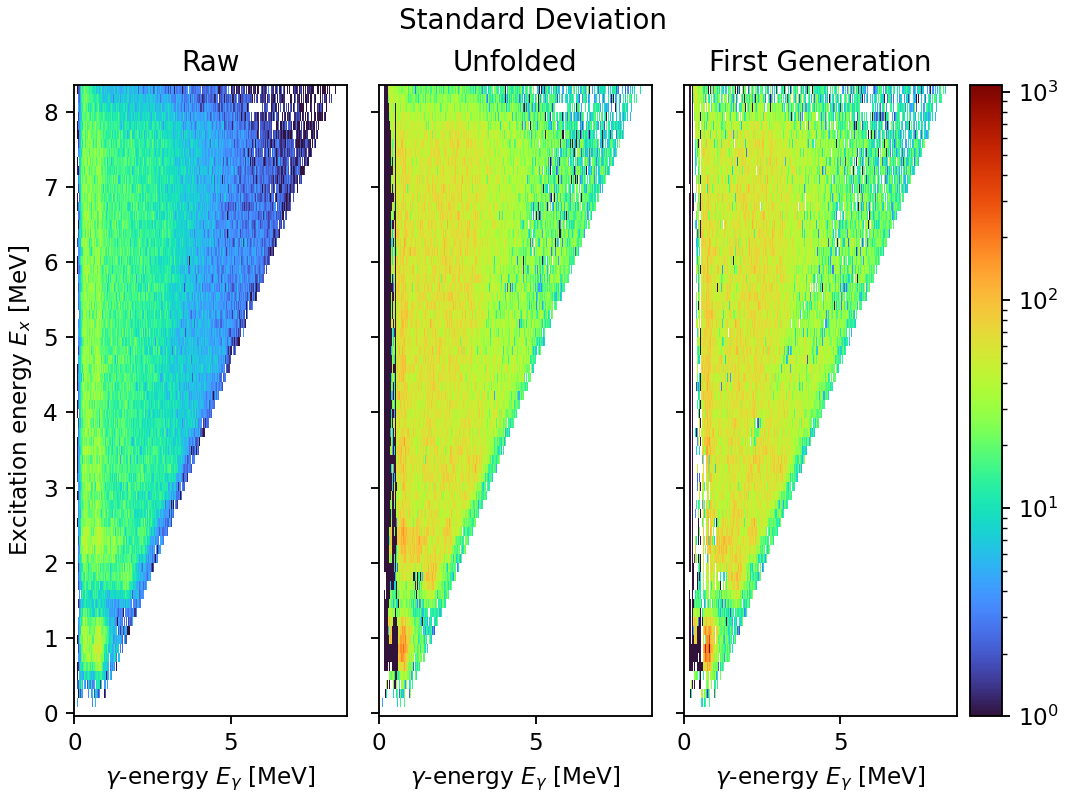

(<Figure size 640x480 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Raw'}, xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{MeV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{MeV}$]'>,
        <AxesSubplot:title={'center':'Unfolded'}, xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{MeV}$]'>,
        <AxesSubplot:title={'center':'First Generation'}, xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{MeV}$]'>],
       dtype=object))

In [63]:
ensemble.plot(cmap='turbo', units='MeV')

## Extractor

In [21]:
logger = om.introspection.get_logger('extractor', 'INFO')
trapezoid_cut = om.Action('matrix')
trapezoid_cut.trapezoid(Ex_min=4000, Ex_max=7000, Eg_min=1000, Eg_max=7000+200, inplace=True)
extractor = om.Extractor()
extractor.trapezoid = trapezoid_cut
# Running the lines below directy, would most probably 
# result in a error like
# The AssertionError: Ex and Eg must have the same step size
#
# Why? The extraction assumes that Ex and Eg have the same binning. Thus we
# need to rebin the ensemble. This works will work inplace. 
# Note: As always, be careful will mid-bin vs lower bin calibration.
# E_rebinned = ensemble.get_firstgen(0).Ex
# 
E_rebinned = np.arange(100., 8500, 200)
ensemble.rebin(E_rebinned, member="firstgen")
ensemble.plot();

  0%|          | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


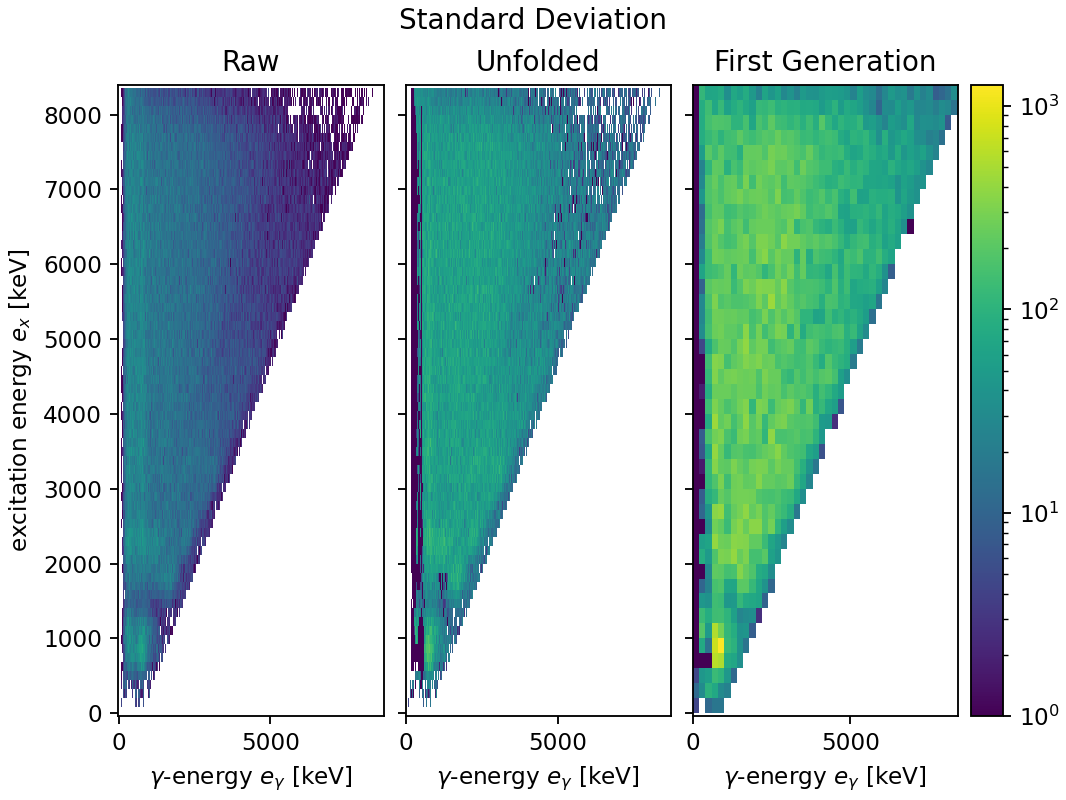

(<Figure size 640x480 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Raw'}, xlabel='$\\gamma$-energy $e_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='excitation energy $e_{x}$ [$\\mathrm{keV}$]'>,
        <AxesSubplot:title={'center':'Unfolded'}, xlabel='$\\gamma$-energy $e_{\\gamma}$ [$\\mathrm{keV}$]'>,
        <AxesSubplot:title={'center':'First Generation'}, xlabel='$\\gamma$-energy $e_{\\gamma}$ [$\\mathrm{keV}$]'>],
       dtype=object))

In [33]:
ensemble = om.Ensemble(path='saved_run/ensemble').load()
ensemble.plot()

  0%|          | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


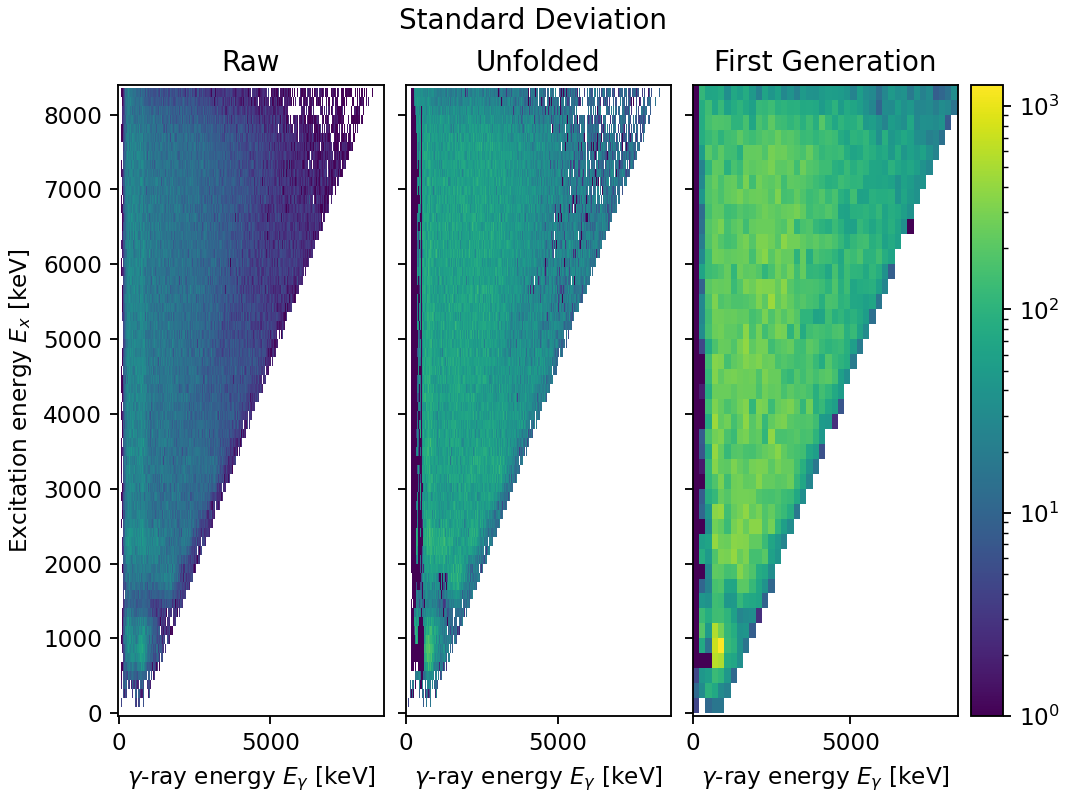

In [10]:
# logger = om.introspection.get_logger('extractor', 'INFO')
trapezoid_cut = om.Action('matrix')
trapezoid_cut.trapezoid(Ex_min=4000, Ex_max=7000, Eg_min=1000, Eg_max=7000+200, inplace=True)
extractor = om.Extractor()
extractor.trapezoid = trapezoid_cut
# Running the lines below directy, would most probably 
# result in a error like
# The AssertionError: Ex and Eg must have the same step size
#
# Why? The extraction assumes that Ex and Eg have the same binning. Thus we
# need to rebin the ensemble. This works will work inplace. 
# Note: As always, be careful will mid-bin vs lower bin calibration.
# E_rebinned = ensemble.get_firstgen(0).Ex
# 
E_rebinned = np.arange(100., 8500, 200)
ensemble.rebin(E_rebinned, member="firstgen")
ensemble.plot();

<IPython.core.display.Javascript object>


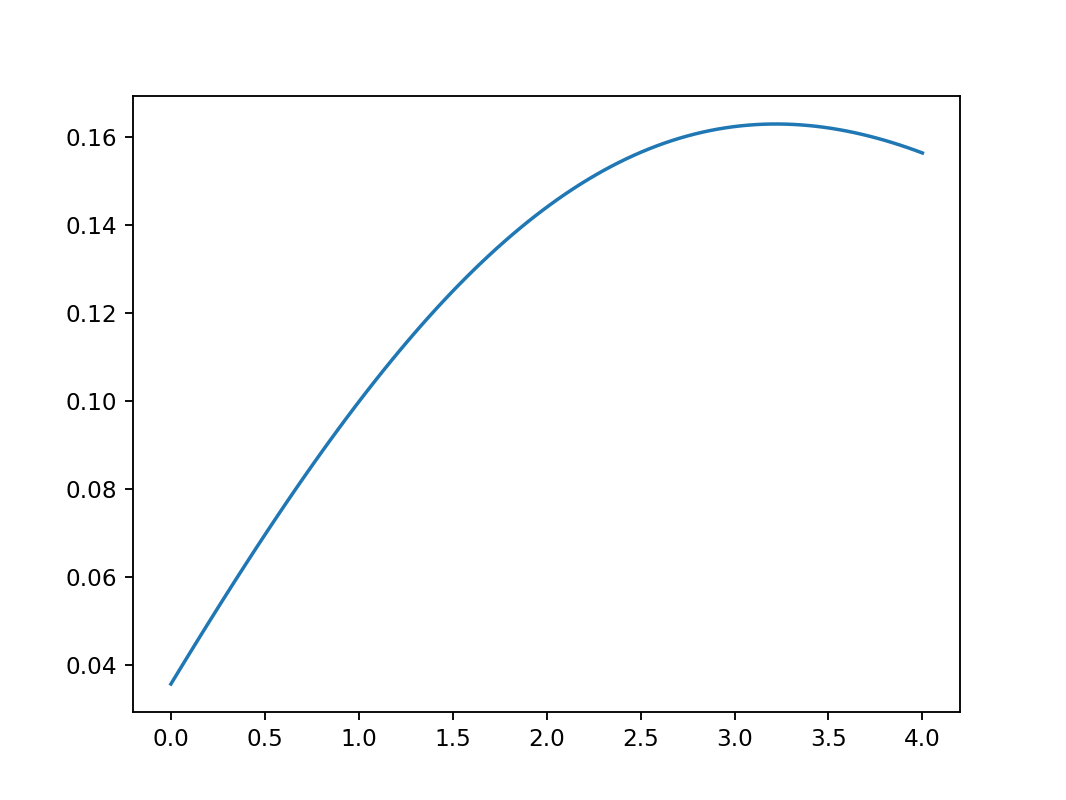

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [8]:
pars = {"mass":70, "NLDa":9.311, "Eshift":0.876, 'Pa_prime':  2.486,
        "Sn": 9.2184, "sigma2_disc":[1.5, 3.6]}
spf = om.SpinFunctions(Ex=[6], J=np.linspace(0, 4, 100), model='EB05', pars=pars)
spf.plot()

(58, 375)


<IPython.core.display.Javascript object>


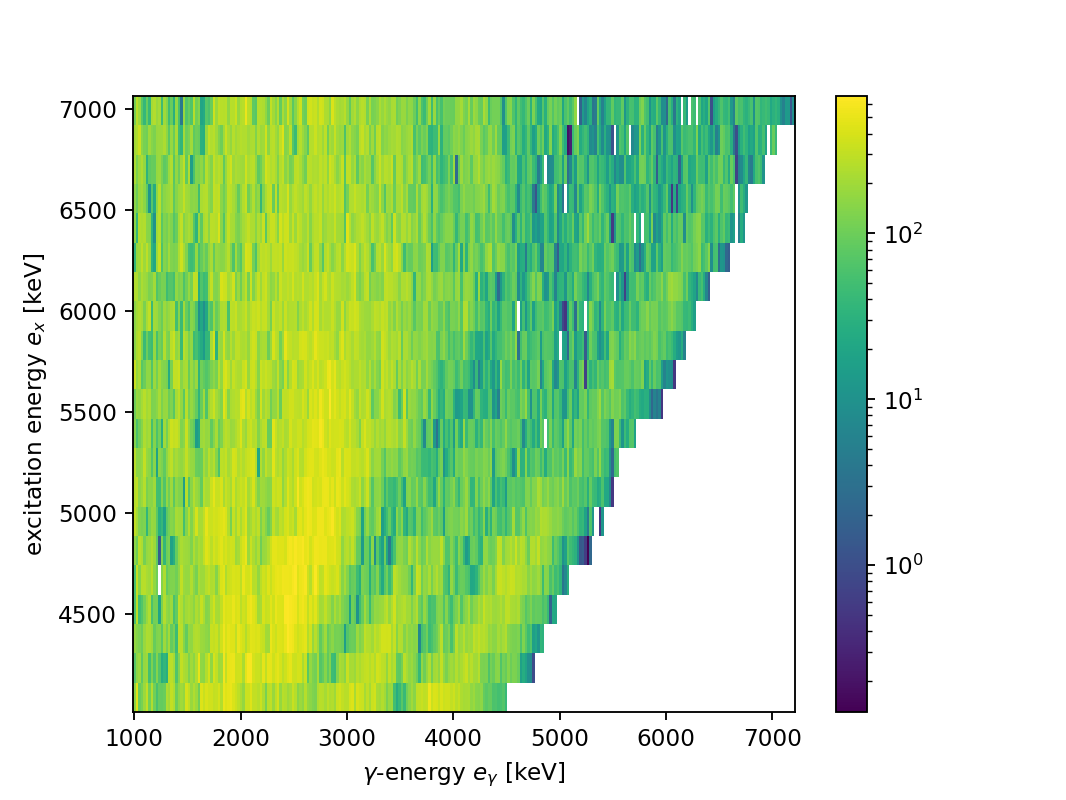

(21, 267)
4 53


<IPython.core.display.Javascript object>


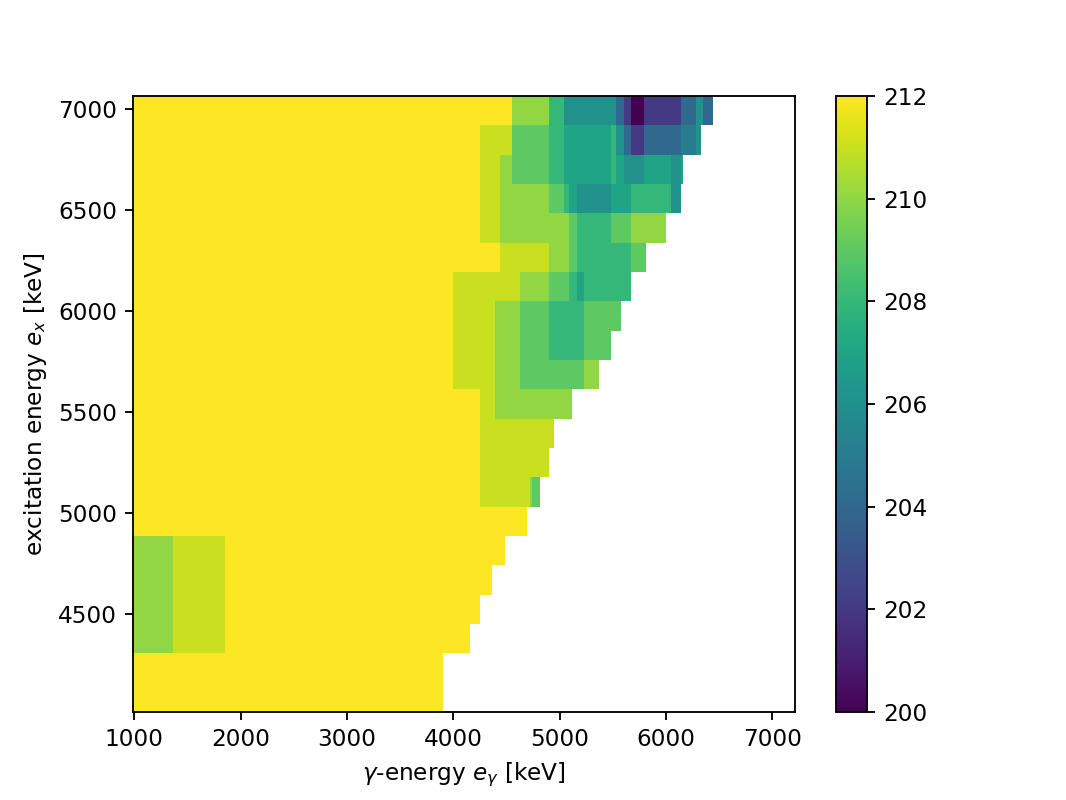

<IPython.core.display.Javascript object>


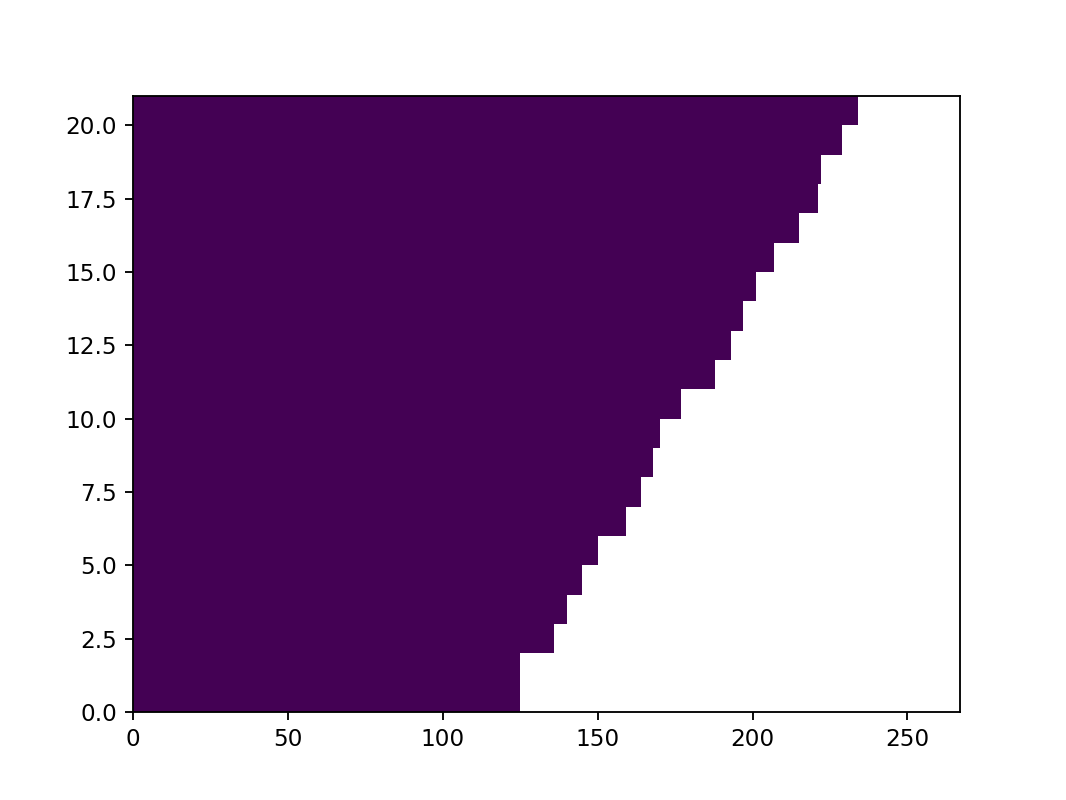

False


In [35]:
trapezoid_cut = om.Action('Matrix')
trapezoid_cut.trapezoid(Ex_min=4000, Ex_max=7000, Eg_min='1 MeV', Eg_max='7.2 MeV', inplace=True)
mat = ensemble.firstgen.clone().rebin('both', factor=1.2)
#for _ in range(150):
#    i = np.random.randint(0, mat.shape[0])
#    j = np.random.randint(0, mat.shape[1])
#    mat[i, j] = 0
print(mat.shape)
trapezoid_cut.act_on(mat)
mat.plot()
print(mat.shape)
f = om.contains_zeroes_patches(mat,threshold=0.1)
print(f)

  0%|          | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


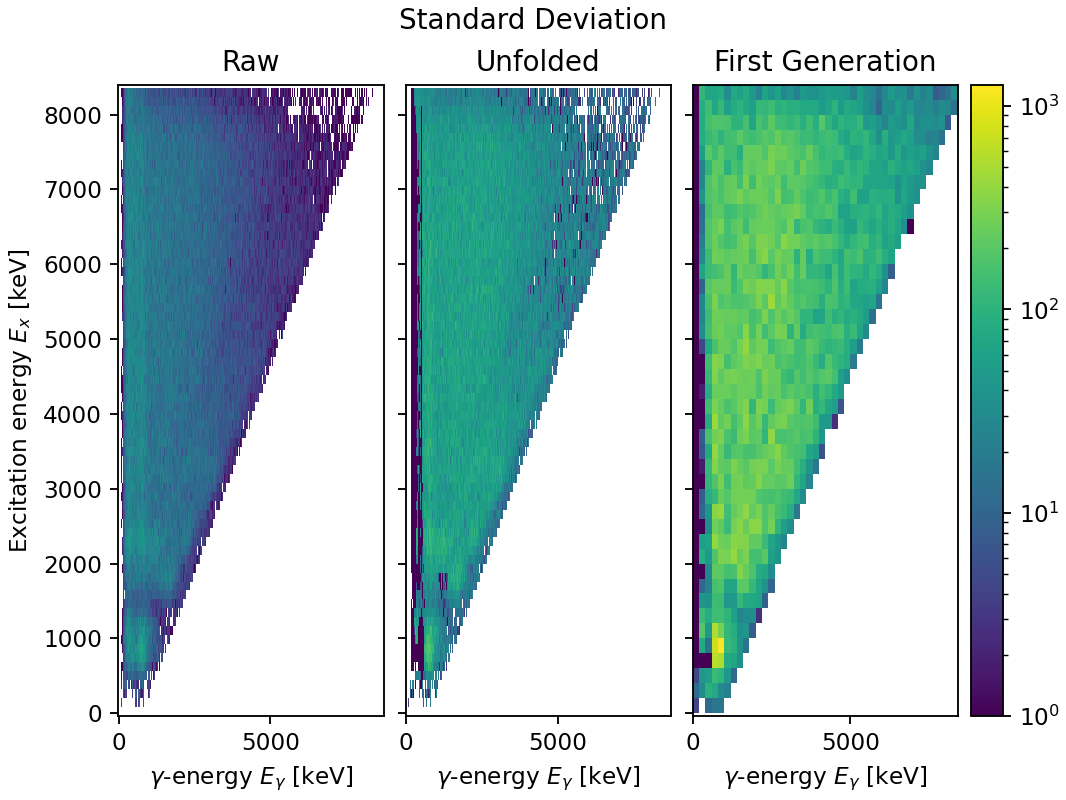

In [41]:
trapezoid_cut = om.Action('Matrix')
trapezoid_cut.trapezoid(Ex_min=4000, Ex_max=7000, Eg_min='1 MeV', Eg_max='7.2 MeV', inplace=True)
E_rebinned = np.arange(100., 8500, 200)
ensemble.rebin(E_rebinned, member="firstgen")
ensemble.plot();
#om.plot_trapezoid(trapezoid_cut, mat)
#trapezoid_cut.act_on(mat)
#mat.plot()
#_, ax, _ = mat.plot()
#trapezoid_cut.act_on(mat)
#mat.plot()

<IPython.core.display.Javascript object>


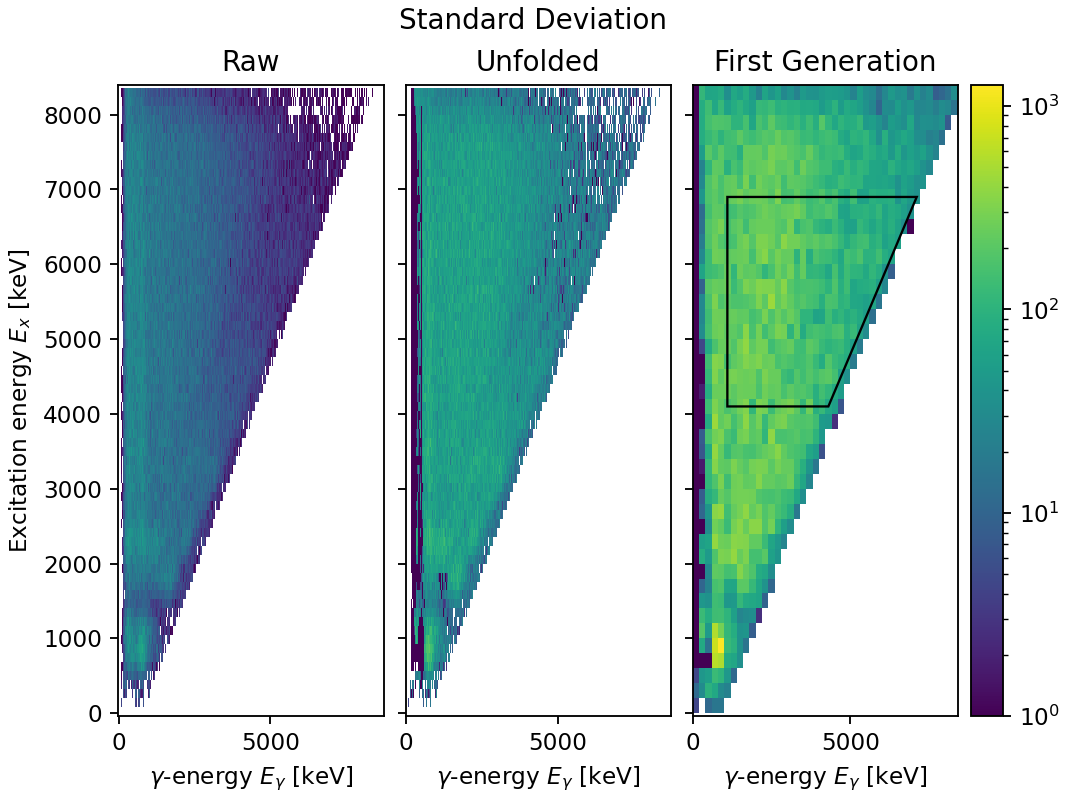

<AxesSubplot:title={'center':'First Generation'}, xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]'>

In [45]:
_, ax = ensemble.plot()
om.plot_trapezoid(trapezoid_cut, ensemble.firstgen, ax=ax[-1], plot_matrix=False)

## Normalization

In [22]:
extractor = om.Extractor()
extractor.load()
#extractor.trapezoid = trapezoid_cut
#extractor.extract_from(ensemble)

3 6


<IPython.core.display.Javascript object>


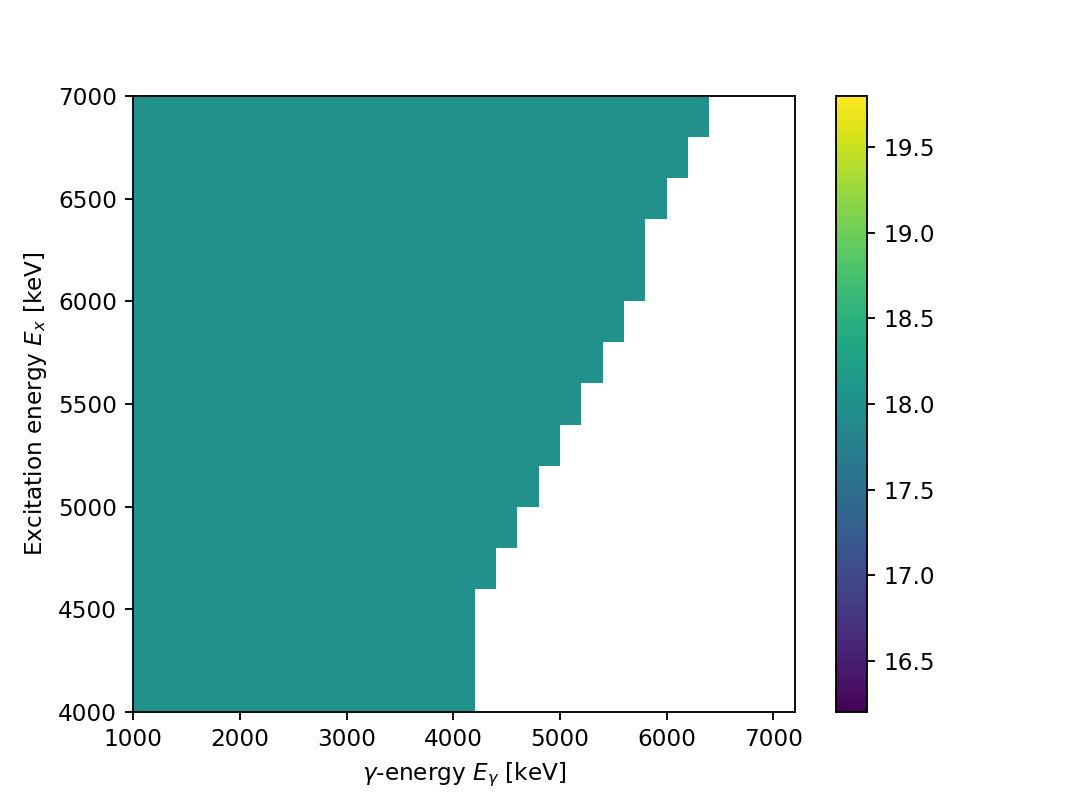

<IPython.core.display.Javascript object>


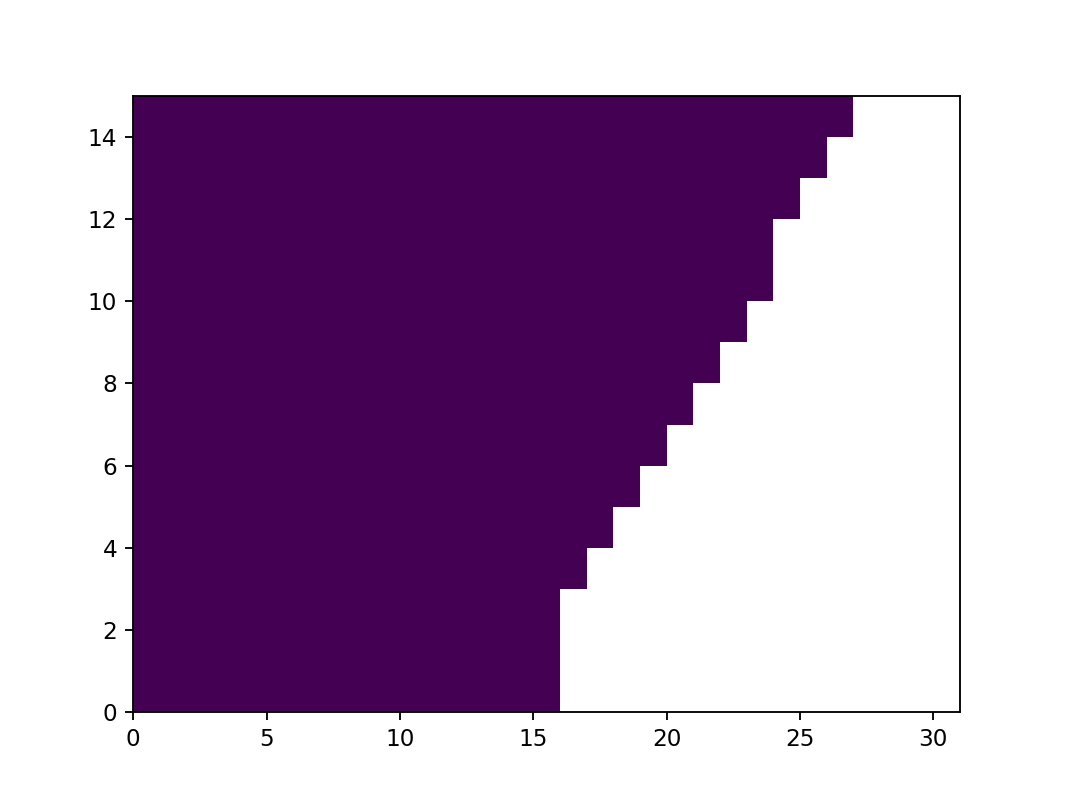

<IPython.core.display.Javascript object>


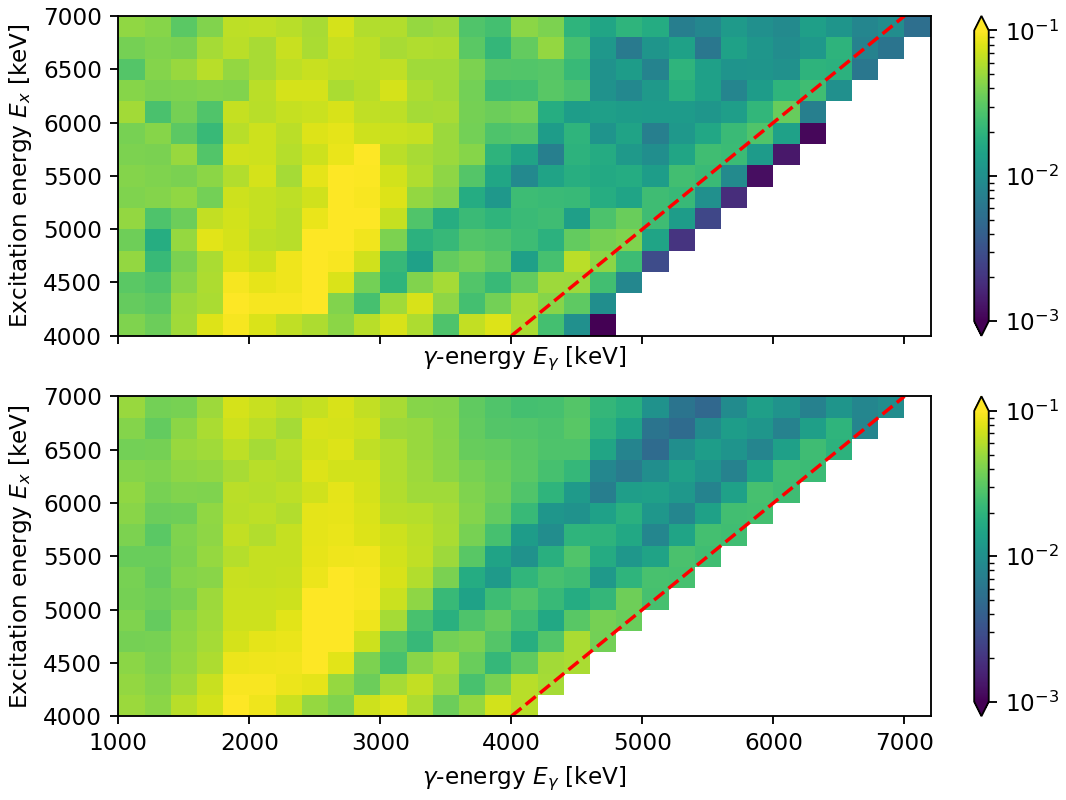

In [50]:
mat = ensemble.get_firstgen(0).clone()
std = ensemble.std_firstgen.clone()
trapezoid_cut.act_on(mat)
trapezoid_cut.act_on(std)
_, _, product = extractor.decompose(mat, std, product=True)
fig, ax = plt.subplots(2,1, constrained_layout=True, sharex=True, sharey=True)
om.normalize_rows(mat.values) 
mat.plot(ax=ax[0], scale="log", vmin=1e-3, vmax=1e-1)
product.plot(ax=ax[1], scale="log", vmin=1e-3, vmax=1e-1)

x = np.linspace(*ax[0].get_ylim())
ax[0].plot(x, x, "r--", label="E_x = E_g")
ax[1].plot(x, x, "r--", label="E_x = E_g");

<IPython.core.display.Javascript object>


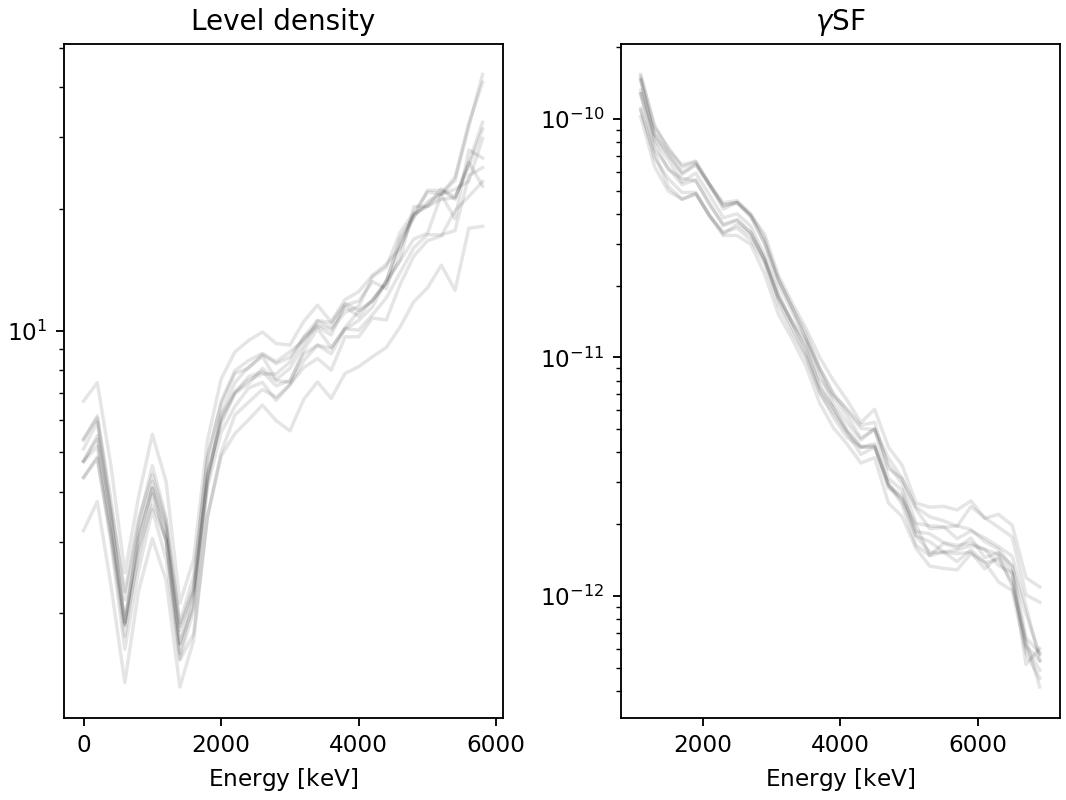

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Level density'}, xlabel='Energy [$\\mathrm{keV}$]'>,
        <AxesSubplot:title={'center':'$\\gamma$SF'}, xlabel='Energy [$\\mathrm{keV}$]'>],
       dtype=object))

In [23]:
extractor.plot()

In [6]:
# let's remove the nan-valued elements (unconstrained elements) for the further analysis
for nld in extractor.nld:
    nld.drop_nan()

for gsf in extractor.gsf:
    gsf.drop_nan()

# the "mean" nld at this stage; we'll use it later, but it's not a good estimate at this
# stage (see article)
nld_mean = extractor.ensemble_nld()

<IPython.core.display.Javascript object>


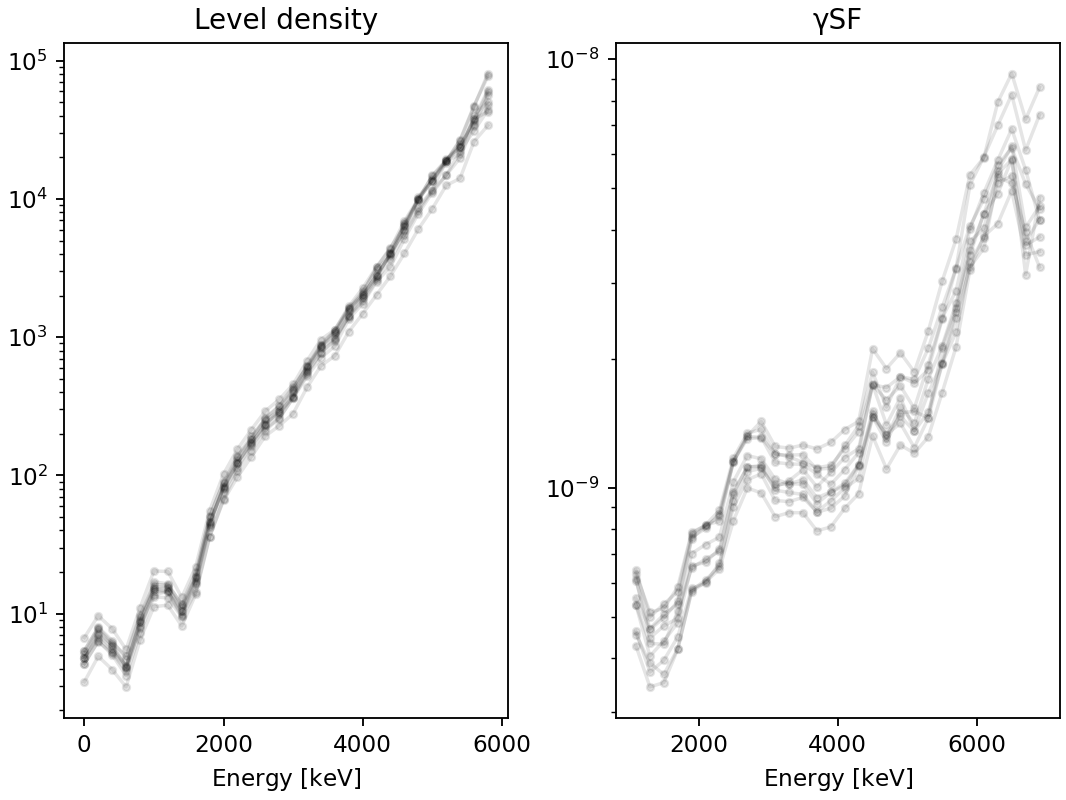

In [34]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_transformed(alpha, A=1, B=1):
    fig, ax = plt.subplots(1, 2, constrained_layout=True)
    for nld, gsf in zip(extractor.nld, extractor.gsf):
        nld.transform(const=A, alpha=alpha, inplace=False).plot(ax=ax[0], scale="log", color='k', alpha=1/10)
        gsf.transform(const=B, alpha=alpha, inplace=False).plot(ax=ax[1], scale="log", color='k', alpha=1/10)
    ax[0].set_title("Level density")
    ax[1].set_title("γSF")

plot_transformed(alpha=0.0013)

In [7]:
normlog = om.introspection.get_logger('normalizer_nld', 'INFO')
nldnorm = om.NormalizerNLD(nld=nld_mean, discrete='../example_data/discrete_levels_Dy164.txt',
                           regenerate=True)

In [8]:
norm_pars = om.NormalizationParameters(name="164Dy")
norm_pars.D0 = [6.8, 0.6]  # eV
norm_pars.Sn = [7.658, 0.001] # MeV
norm_pars.spincutModel = 'Disc_and_EB05'  # see eg. Guttormsen et al., 2017, PRC 96, 024313
norm_pars.spincutPars = {"mass":164, "NLDa":18.12, "Eshift":0.31,
                         "Sn": norm_pars.Sn[0], "sigma2_disc":[1.5, 3.6]}
norm_pars.Jtarget = 5/2 # A-1 nucleus

nldnorm.normalize(limit_low=[0, 1.5], limit_high=[3, 5.5], norm_pars=norm_pars)

2021-05-07 10:08:29,735 - ompy.normalizer_nld - INFO - 

---------
Normalizing nld #0
2021-05-07 10:08:34,535 - ompy.normalizer_nld - INFO - DE results:
┌───────────────────┬────────────────────┬────────────────────┬──────────────────────┐
│ A                 │ α [MeV⁻¹]          │ T [MeV]            │ Eshift [MeV]         │
╞═══════════════════╪════════════════════╪════════════════════╪══════════════════════╡
│ 1.620473422365775 │ 1.3326665889301297 │ 0.5640171335731906 │ -0.33859125448491256 │
└───────────────────┴────────────────────┴────────────────────┴──────────────────────┘
2021-05-07 10:08:34,536 - ompy.normalizer_nld - INFO - Starting multinest
  analysing data from multinest/nld_norm_0_.txt
2021-05-07 10:08:58,010 - ompy.normalizer_nld - INFO - Multinest results:
┌─────────────┬───────────────┬─────────────────┬──────────────┐
│ A           │ α [MeV⁻¹]     │ T [MeV]         │ Eshift [MeV] │
╞═════════════╪═══════════════╪═════════════════╪══════════════╡
│ 1.64 ± 0.11 │ 1.330

<IPython.core.display.Javascript object>


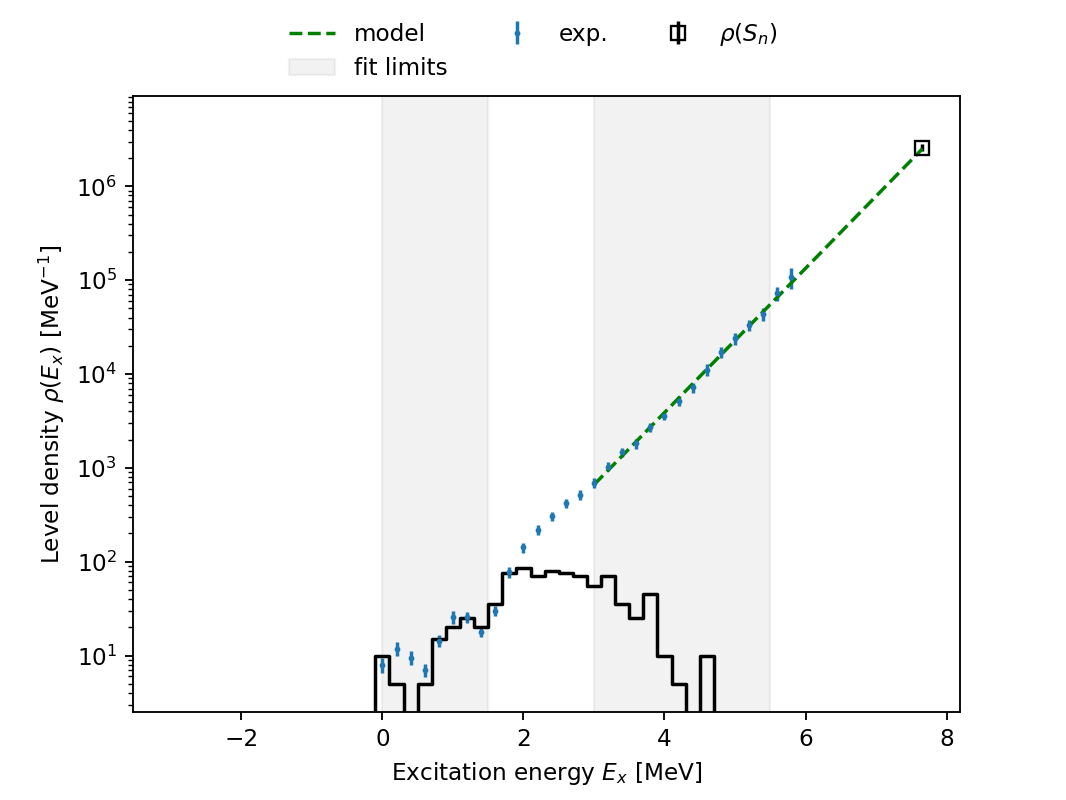

In [9]:
nldnorm.plot();

<IPython.core.display.Javascript object>


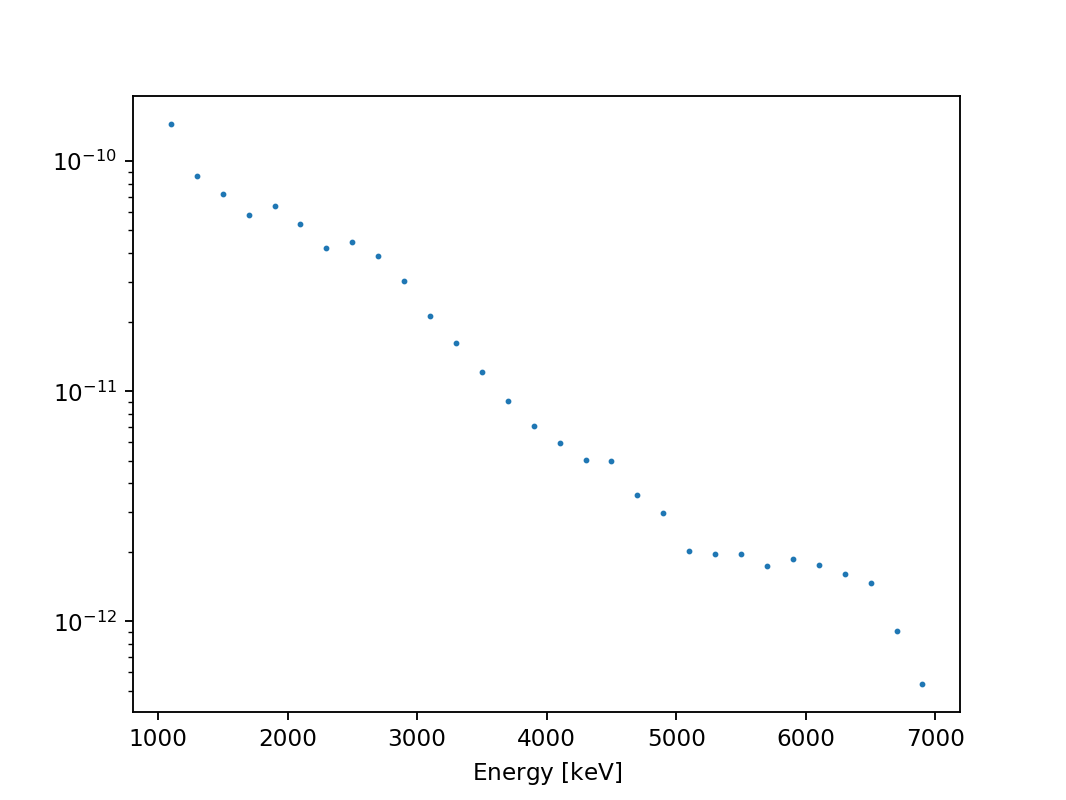

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Energy [$\\mathrm{keV}$]'>)

In [26]:
extractor.gsf[1].plot(scale='log')

In [36]:
normlog = om.introspection.get_logger('normalizer_gsf', 'DEBUG')
gsfnorm = om.NormalizerGSF(normalizer_nld=nldnorm, gsf=extractor.gsf[0],
                           regenerate=True)

# to be use for gsf normalization
norm_pars.Gg = [113., 13.]  #meV

gsfnorm.norm_pars = norm_pars
gsfnorm.model_high.Efit = [4.5, 6.]

2021-05-07 13:16:17,649 - ompy.normalizer_gsf - DEBUG - Setting nld from from normalizer_nld
2021-05-07 13:16:17,657 - ompy.normalizer_gsf - DEBUG - Setting alpha from from normalizer_nld
2021-05-07 13:16:17,666 - ompy.normalizer_gsf - DEBUG - Setting nld_model from from normalizer_nld
2021-05-07 13:16:17,674 - ompy.normalizer_gsf - INFO - Normalizing #0
2021-05-07 13:16:17,676 - ompy.normalizer_gsf - DEBUG - Fitting extrapolation parameters
2021-05-07 13:16:17,683 - ompy.normalizer_gsf - DEBUG - Extrapolating low: Model model_low

_Model__isfrozen: bool = False

Exponential scaling Exp[scale*Eg + shift]before normalization in MeV^-1
scale: float = 0.7926253078419533

Exponential shift Exp[scale*Eg + shift]before normalization
shift: float = -22.703130569423053

Exponential shift Exp[scale*Eg + shift]after normalization
shift_after: float = -22.703130569423053

Minimal gamma energy to extrapolate from in MeV
Emin: Optional[float] = 0

Maximal gamma energy to extrapolate from in MeV
Ema

<IPython.core.display.Javascript object>


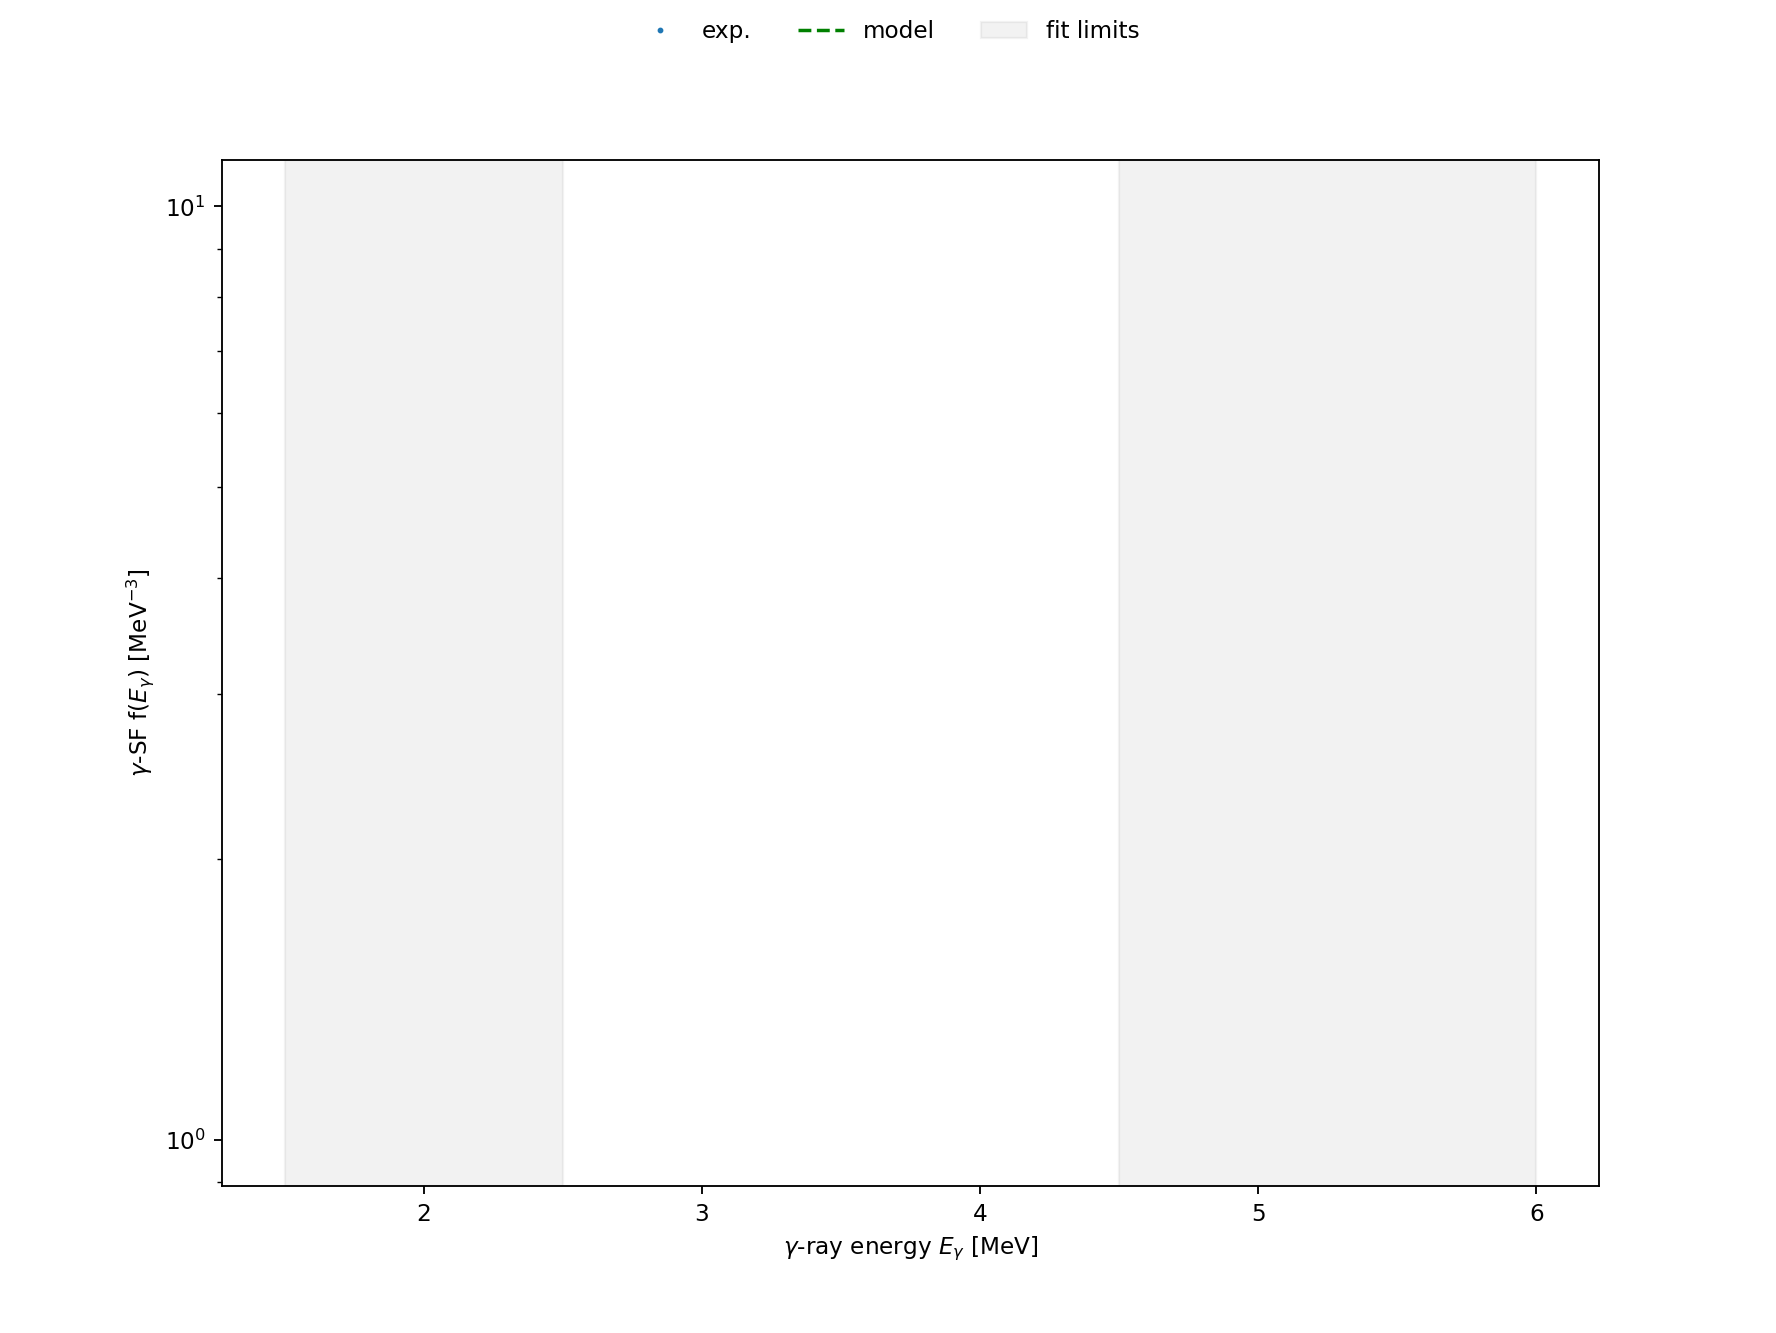

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='$\\gamma$-ray energy $E_\\gamma$ [$\\mathrm{MeV}$]', ylabel='$\\gamma$-SF f($E_\\gamma$) [$\\mathrm{MeV}^{-3}$]'>)

In [37]:
gsfnorm.normalize()
gsfnorm.plot()

In [9]:
gsfnorm = om.NormalizerGSF(normalizer_nld=nldnorm, gsf=gsf,
                           regenerate=True)

# to be use for gsf normalization

norm_pars = om.NormalizationParameters(name="70Zn")
norm_pars.Gg = [380., 50.]  #meV
norm_pars.D0 = [700, 50]  # eV5
norm_pars.Sn = [9.2184, 0.001] # MeV
norm_pars.spincutModel = 'EB05'  # see eg. Guttormsen et al., 2017, PRC 96, 024313
norm_pars.spincutPars = {"mass":70, "NLDa":8.770, "Eshift":0.819, #-1.938,
                         "Sn": norm_pars.Sn[0], "sigma2_disc":[1.5, 3.6]}
norm_pars.Jtarget = 5/2 # A-1 nucleus
gsfnorm.norm_pars = norm_pars
gsfnorm.model_high.Efit = [5,9]
gsfnorm.model_low.Efit = [2, 3]

NameError: name 'nldnorm' is not defined

In [ ]:
with om.SpinModel('EB05') as sm:
    sm.mass = 70
    sm.NLDa = 8.770
    sm.Eshift = 0.819
    sm.sigma2_disc = [1.5, 3.6]

handle = open('pathname')
handle.write('sutff')
handle.close()
with open('pathname') as handle:
    handle.write('stuff')
    

    
with om.NormalizationModel as m:
    m.Gg = [380, 50]
    m.D0 = '0.7+-0.05 keV'
    m.Sn = '9.2184(0.1) MeV'
    m.Jtarget = 5/2
    m.spinmodel = sm
    


In [61]:
class A(metaclass=MetaCls):
    default_vals = {}
    def __new__(cls):
         print("Creating instance")
         return super(A, cls).__new__(cls)
  
    def __init__(self):
        print("Init is called")
        
    @classmethod
    def register(cls, name, vals):
        cls.default_vals[name] = vals

clsname: A
superclasses: ()
Is Root class
attrdict: {'__module__': '__main__', '__qualname__': 'A', 'default_vals': {}, '__new__': <function A.__new__ at 0x7fd2a0fab790>, '__init__': <function A.__init__ at 0x7fd2a0fabb80>, 'register': <classmethod object at 0x7fd2a1033730>, '__classcell__': <cell at 0x7fd2a1033ca0: empty>}


In [62]:
class B(A):
    D0 = 5
    B = 'fish'
    def __init__(self):
        print("New B!")

clsname: B
superclasses: (<class '__main__.A'>,)
attrdict: {'__module__': '__main__', '__qualname__': 'B', 'D0': 5, 'B': 'fish', '__init__': <function B.__init__ at 0x7fd2a0fabc10>}


In [65]:
A.default_vals

{'B': {'__module__': '__main__',
  '__qualname__': 'B',
  'D0': 5,
  'B': 'fish',
  '__init__': <function __main__.B.__init__(self)>},
 'C': {'__module__': '__main__',
  '__qualname__': 'C',
  'D0': 6,
  'T': 5,
  '__init__': <function __main__.C.__init__(self)>}}

In [64]:
class C(B, B2):
    D0 = 6
    T = 5
    def __init__(self):
        print("New C!")

clsname: C
superclasses: (<class '__main__.B'>, <class '__main__.B2'>)
attrdict: {'__module__': '__main__', '__qualname__': 'C', 'D0': 6, 'T': 5, '__init__': <function C.__init__ at 0x7fd2a0fab310>}


In [46]:
class B2:
    pass

In [53]:
class MetaCls(type):
    """A sample metaclass without any functionality"""
    def __new__(cls, clsname, superclasses, attributedict):
        print("clsname:", clsname)
        print("superclasses:", superclasses)
        if superclasses is ():
            print("Is Root class")
        else:
            root = superclasses[0].__mro__[-2]
            root.register(clsname, attributedict)
        print("attrdict:", attributedict)
        return super(MetaCls, cls).__new__(cls, \
                       clsname, superclasses, attributedict)

In [31]:
C()

Creating instance
New C!


In [42]:
print(super(B))

<super: <class 'B'>, NULL>


In [40]:
?super

In [48]:
C.__mro__

(__main__.C, __main__.B, __main__.A, __main__.B2, object)

In [54]:
class Foo:
    vals = []
    @classmethod
    def update(cls, val):
        cls.vals.append(val)

In [55]:
foo = Foo()

In [57]:
foo.update("duck")

In [58]:
foo.vals

['duck']

In [59]:
Foo.vals

['duck']

In [60]:
Foo.update("fish")

In [1]:
import ompy as om

In [2]:
with om.SpinModel('EB09Emp') as m:
    m.mass = 70
    m.Pa_prime = '7'
print(str(m))

>>>>>
TRIED TO SET TO NONE. Using autoreload?
TRIED TO SET TO NONE. Using autoreload?
<<<<<


In [2]:
om.SpinFunction.available()

['Const', 'EB05', 'EB09CT', 'EB09Emp', 'DiscAndEB05']

In [4]:
eb05 = om.SpinFunction.get_model("EB09Emp")
eb05(70, '1.0 keV')(0.5, 4)

array(0.13062341)

In [9]:
list(enumerate(om.SpinFunction._models))

[(0, 'Const'), (1, 'EB05'), (2, 'EB09CT'), (3, 'EB09Emp'), (4, 'DiscAndEB05')]

In [2]:
import inspect

In [16]:
vals = inspect.getmembers(om.EB05, lambda x: not inspect.isroutine(x))
vals = [v for v in vals if not v[0].startswith('__')]
cut_names = {v[0][1:] for v in vals}
vals = [v[0] for v in vals if v[0] in cut_names]
print(vals)

TRIED TO SET TO NONE. Using autoreload?
TRIED TO SET TO NONE. Using autoreload?
TRIED TO SET TO NONE. Using autoreload?
['Eshift', 'NLDa', 'mass']


In [12]:
om.EB05.__

(ompy.spinfunctions.EB05, ompy.spinfunctions.SpinFunction, object)

In [17]:
vars(om.EB05)['mass']

In [10]:
import re

In [43]:
m = re.match("(.+)(?:\+\-|\-\+|±)(.+)", "-5±6 eV")
print(m.groups())
n = re.match("(.+)\((.+)\)\s*(?P<u>.*)", "50(6)keV")
print(n.groups())

('-5', '6 eV')
('50', '6', 'keV')


In [6]:
class A:
    def __init__(self):
        print("duck!")

class B:
    def __init__(self):
        print("Init B")
    
    def __enter__(self):
        print("ENTER B")
        return A()
    
    def __exit__(self, *args):
        print(args)
        print("EXIT B")

In [8]:
with B() as b:
    print(b)
    print("In with")

Init B
ENTER B
duck!
In with
(None, None, None)
EXIT B


In [77]:
si = om.example_raw('si28').cut('Ex', Emax='11 MeV').cut_diagonal(E1=(800, 0), E2=(11600, 10660))

<IPython.core.display.Javascript object>


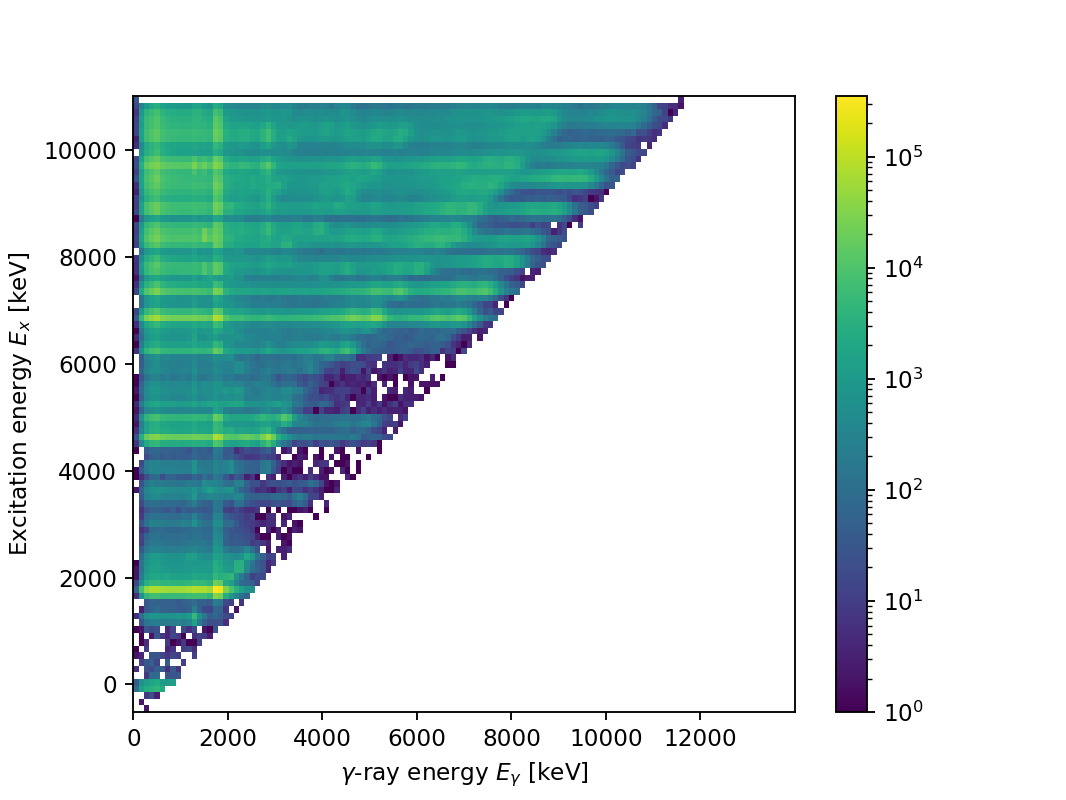

((<matplotlib.collections.QuadMesh at 0x7fb412abdfa0>,
  <matplotlib.colorbar.Colorbar at 0x7fb4129c87c0>),
 <AxesSubplot:xlabel='$\\gamma$-ray energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 <Figure size 640x480 with 2 Axes>)

In [78]:
si.plot()

In [15]:
import scipy.ndimage as nd

In [90]:
N = 3
w = np.array(np.ones((N, N)))
v = si.values
vv = v/v
vv[np.isnan(vv)] = 0
c = nd.convolve(vv, w)

In [80]:
def pplot(c):
    fig, ax = plt.subplots(figsize=(5, 5))
    current_cmap = matplotlib.cm.get_cmap('turbo')
    current_cmap.set_bad(color='white')
    mask = c == 0
    masked = np.ma.array(c, mask=mask)
    norm = LogNorm()
    ax.pcolormesh(masked, cmap=current_cmap, norm=norm)
    return ax

<IPython.core.display.Javascript object>


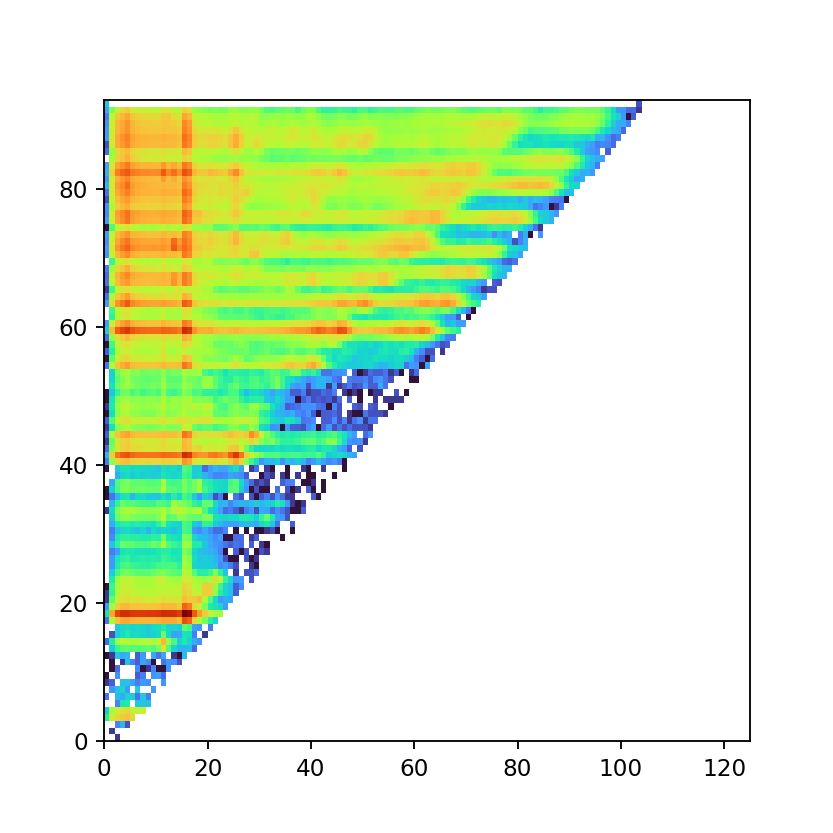

<IPython.core.display.Javascript object>


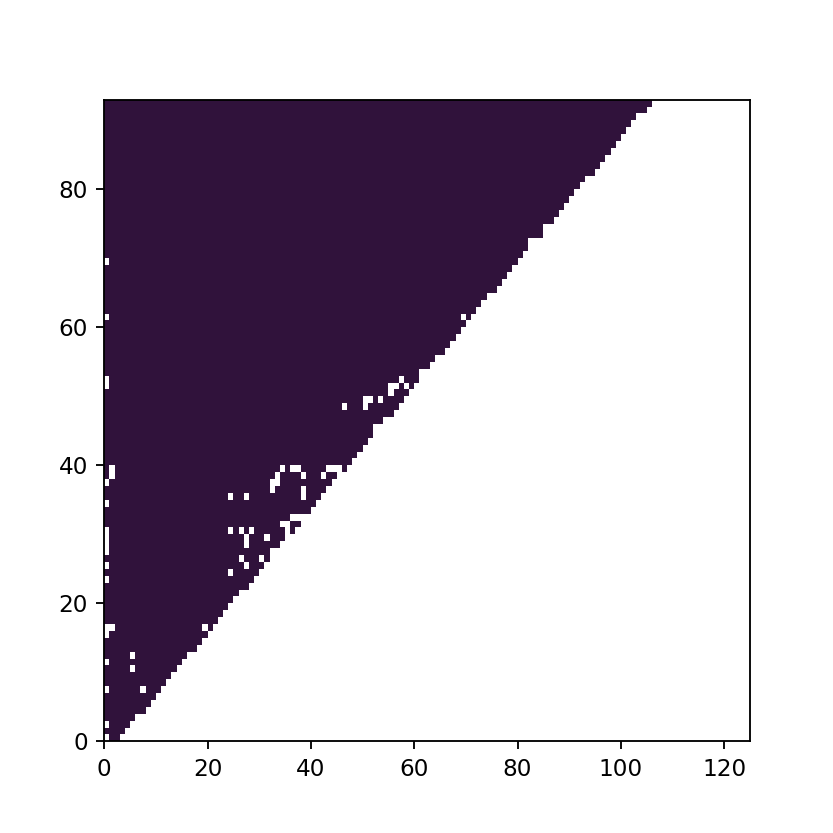

<IPython.core.display.Javascript object>


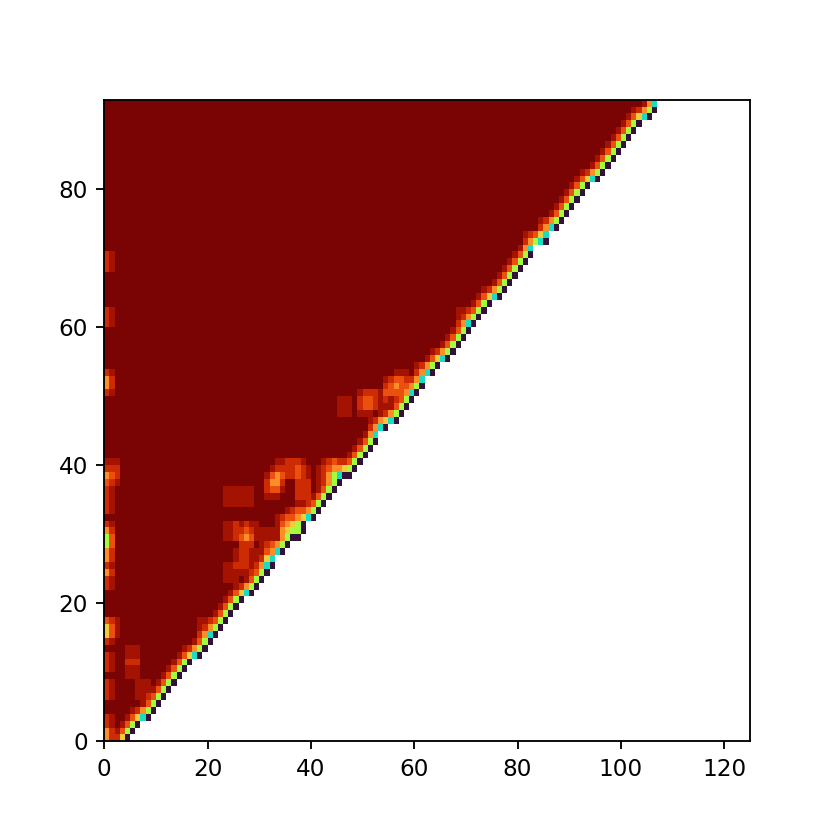

<IPython.core.display.Javascript object>


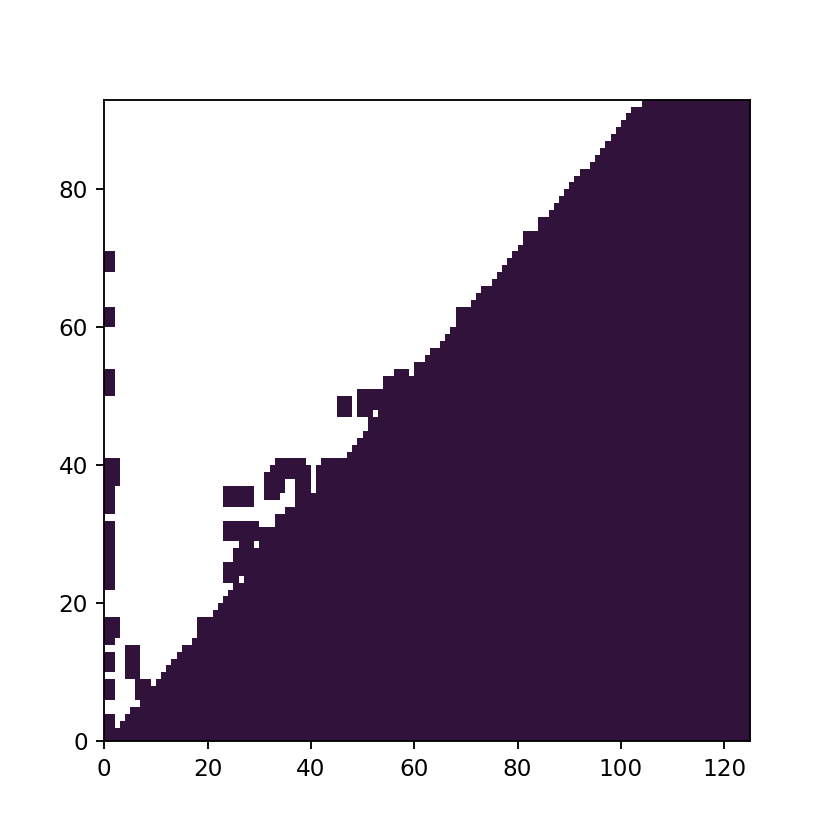

<AxesSubplot:>

In [91]:
pplot(si.values)
pplot(vv)
pplot(c)
c2 = np.where(c < (N*N), True, False)
pplot(c2)

In [22]:
%matplotlib notebook

In [27]:
import matplotlib

In [50]:
print(vv)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]]


In [54]:
?np.where

In [88]:
for i, j in si.diagonal_elements():
    c[i, j] = 10

<IPython.core.display.Javascript object>


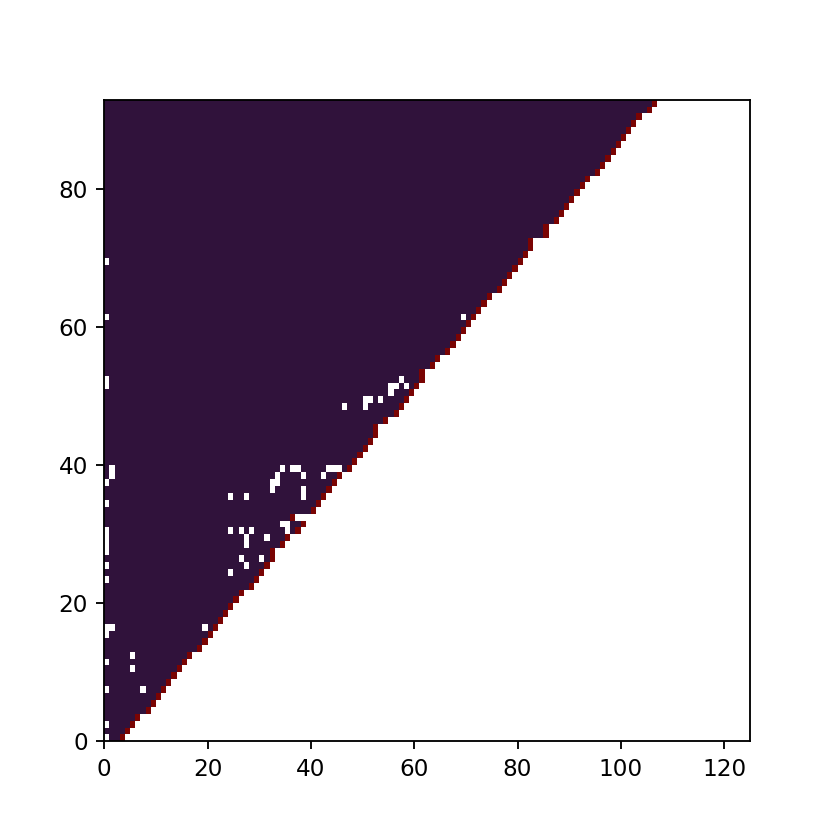

<AxesSubplot:>

In [83]:
pplot(vv)

In [85]:
c.shape

(93, 125)